## <span style="color: orange;">Data Exploration</span>

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
%pip install nltk
import nltk
%pip install --upgrade pandas
%pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Read xsl file
df = pd.read_excel('Group1.xlsx')


In [3]:
df # 2332 observations and 5 columns

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  
0     Dear Mr. Mendel, \nHope you are doing well! \n...  
1     Dear Mr. Novak, \nThank you for reaching out t...  
2     Dear Mr. Mendel, \nThank your kind response – ...  
3     Dear Mr. Novak, \nThank you for your swift rep...  
4     Dear Mr. Mendel, \nThank you for your proposal...  
...                                                 ...  
2327  Dear Chis Meyer,\n \nthank you for your latest...  
2328  Dear Alex Kramer,\nthank you very much for you...  
2329  Dear Chris Meyer,\nthank you for your fast ans...  
2330  Dear Alex Kramer,\nI am still very interested ...  
2331  Dear Chris Meyer,\n \nI'm so sorry but I can n...  

[2332 rows x 5 columns]

#####  **<span style="color: orange;">Missing values and Duplicates</span>**

In [4]:
# Check for missing values
df.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df
duplicates = df[df.duplicated()]
duplicates

SenderID  ReceiverID    ActionType  NegoOutcome  \
215        965         966  Counteroffer  FinalAccept   
270       1105        1106  Counteroffer  FinalReject   
400       1441        1442  Counteroffer  FinalReject   
470       1833        1834   FinalAccept  FinalAccept   
731       3037        3038  Counteroffer  FinalAccept   
929       3877        3878  Counteroffer  FinalAccept   
1555        48          47  Counteroffer  FinalAccept   
1747        48          47  Counteroffer  FinalAccept   

                                                Content  
215   Dear Mr.Novak, \nI am so glad both of our side...  
270   Dear Ms. Novak, \nI assure you that there is n...  
400   Thank you for sending me your first offer. Alt...  
470   So, Ms. Novak, this is our official acceptance...  
731   Dear Mr. Novak, \nI would really like to close...  
929   Dear Sasa, of course you agree with the direct...  
1555  Dear Mr. Kramer, sorry for my late response, b...  
1747  Dear Mr. Kramer, sorry for my late response, b...

<p style="text-align: justify;">
The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that may be considered an preprocessed to prevent errors in the data cleansing part of this project.
</p>

## **<span style="color: orange;"> Analyzing text statistics</span>**

For starters, we will begin with standard exploration techniques in NLP data epxloration this includes the following:

- **<span style="color: teal;">word frequency analysis</span>**
- **<span style="color: teal;">sentence length analysis</span>**
- **<span style="color: teal;">average word length analysis</span>**

The insights to these standard data will help us identify any patterns that we may consider preprocess further. We want to identify important features of the content/text data.

In [6]:
# Check the length of the content
df["length"] = df["Content"].str.len()
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  length  
0  Dear Mr. Mendel, \nHope you are doing well! \n...    2529  
1  Dear Mr. Novak, \nThank you for reaching out t...    2579  
2  Dear Mr. Mendel, \nThank your kind response – ...    2336  
3  Dear Mr. Novak, \nThank you for your swift rep...    1961  
4  Dear Mr. Mendel, \nThank you for your proposal...    1917

In [7]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount_basic'] = df['Content'].apply(word_count)
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  length  WordCount_basic  
0  Dear Mr. Mendel, \nHope you are doing well! \n...    2529              429  
1  Dear Mr. Novak, \nThank you for reaching out t...    2579              439  
2  Dear Mr. Mendel, \nThank your kind response – ...    2336              409  
3  Dear Mr. Novak, \nThank you for your swift rep...    1961              345  
4  Dear Mr. Mendel, \nThank you for your proposal...    1917              343

In [8]:
df["NegoOutcome"].value_counts() 

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

<p style="text-align: justify;">
The results indicate that the data is somewhat imbalanced, with <span style="color: teal;"> 1604 accepted messages</span>  and <span style="color: teal;"> 728 rejected messages</span> . Our next step is to create new columns that contain the text of accepted and rejected messages. Additionally, we are interested in examining the distribution of labels across the entire dataset. Specifically, we want to identify the number of offers and counteroffers within the dataset. This is important because we plan to remove observations that could bias our results or final predictions, such as messages already labeled as FinalReject or FinalAccept. Although these messages clearly indicate the outcome from the beginning, it is crucial to include some of them in our training and test data to verify our predictions.
</p>

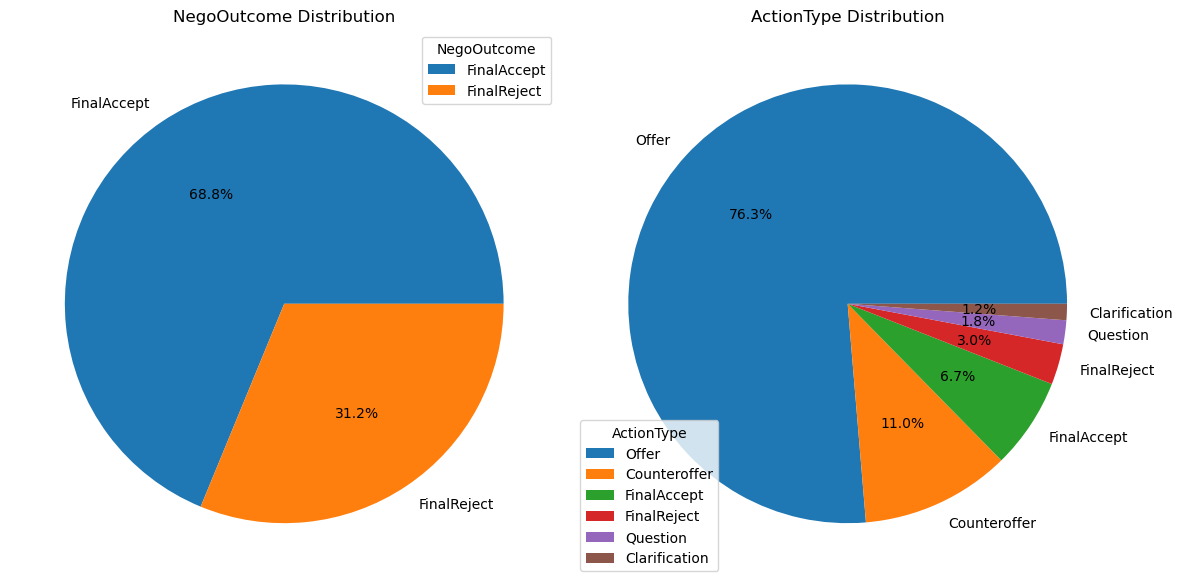

In [9]:
import matplotlib.pyplot as plt

#Plot the pie chart for NegoOutcomeLabel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(df['NegoOutcome'].value_counts(), labels=df['NegoOutcome'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="NegoOutcome", loc="best")
plt.title('NegoOutcome Distribution')

#Plot the pie chart for ActionType
plt.subplot(1, 2, 2)
plt.pie(df['ActionType'].value_counts(), labels=df['ActionType'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="ActionType", loc="best")
plt.title('ActionType Distribution')

#Show the plots
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
The pie charts reveal key insights into negotiation outcomes and actions. In the NegoOutcome Distribution, 68.8% of negotiations result in FinalAccept, while 31.2% end in FinalReject, indicating a generally positive trend but leaving room for improvement in reducing rejection rates. The ActionType Distribution highlights that the majority of actions (76.3%) are Offers, showing that negotiations are primarily driven by direct proposals. Counteroffers account for 11.0%, suggesting some level of iterative negotiation, while FinalAccept (6.7%) and FinalReject (3.0%) reflect decisions as part of the negotiation flow. Notably, Clarifications (1.2%) and Questions (1.8%) are minimal, indicating limited emphasis on probing or clarifying details during negotiations. Overall, while the high acceptance rate demonstrates success, enhancing the use of clarifications and questions could help reduce rejections by ensuring better alignment and understanding throughout the negotiation process.
</p>

In [10]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [11]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [12]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1604, 728)

<p style="text-align: justify;">
Until now, we have noted that the dimensions are the same, but there are some inconsistencies in the text messages that need to be addressed. For example, there are persistent markers like /n or "" that need to be removed as they can influence our results. We will address this in the data cleansing part, ensuring that these biased characters are removed to prevent inaccurate predictions in the future.
</p>

## **<span style="color: orange;">Overall important KPI's</span>**

# Overall word count for the whole dataset
accepted_word_count_sum = accepted_messages.apply(word_count).sum()
rejected_word_count_sum = rejected_messages.apply(word_count).sum()


# Overall sum of all words
total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

accepted_word_count_sum, rejected_word_count_sum, total_word_count_sum


In [13]:

# Overall word count for the whole dataset
accepted_word_count_sum = accepted_messages.apply(word_count).sum()
rejected_word_count_sum = rejected_messages.apply(word_count).sum()

# Overall sum of all words
total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

accepted_word_count_sum, rejected_word_count_sum, total_word_count_sum

(351688, 186734, 538422)

In [14]:
# Check if the sum of the two counts is equal to the total number of rows in the df
df.shape

(2332, 7)

### **<span style="color: orange;">Calculating Average Lengths</span>**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

# Adding aditional parameters to the current df based on the nltk library
df['Content_Length'] = df['Content'].apply(len)
df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

# Calculate averages
average_content_length = df['Content_Length'].mean()
average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
average_word_length = df['Content_Length'].sum() / df['Word_Count_nltk'].sum()


print(f"Average Content Length: {average_content_length}")
print(f"Average Sentence Length: {average_sentence_length}")
print(f"Average Word Length: {average_word_length}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Content Length: 1291.4202401372213
Average Sentence Length: 98.42768898911658
Average Word Length: 5.03256403100827


<p style="text-align: justify;">

The results show that:
- Average Content Length: **<span style="color: teal;">1291.42 characters.</span>** This indicates that, on average, each piece of content in the dataset is approximately 1291 characters long, including all letters, numbers, and punctuation.  

- Average Sentence Length: **<span style="color: teal;">98.43 characters.</span>**. This shows that, on average, each sentence in the content is about 98 characters long, giving an idea of the typical sentence length in the dataset.  

- Average Word Length: **<span style="color: teal;">5.03 characters.</span>** This suggests that, on average, each word in the content is about 5 characters long, which is typical for English text.

It would be interesting to see how the averages change if we remove stopwords and further inconsistencies in the data since those may bias the given results right now but we also want to see if there is any difference between the accepted and rejected messages.
</p>

In [16]:
# Calculate total content length, sentence count, and word count for accepted and rejected content
total_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].sum()
total_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].sum()
total_sentence_count_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].sum()
total_sentence_count_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].sum()
total_word_count_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].sum()
total_word_count_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].sum()

# Calculate average sentence length and average word length for accepted and rejected content
average_sentence_length_accepted = total_content_length_accepted / total_sentence_count_accepted
average_sentence_length_rejected = total_content_length_rejected / total_sentence_count_rejected
average_word_length_accepted = total_content_length_accepted / total_word_count_accepted
average_word_length_rejected = total_content_length_rejected / total_word_count_rejected

print(f"Average Sentence Length (Accepted): {average_sentence_length_accepted}")
print(f"Average Sentence Length (Rejected): {average_sentence_length_rejected}")
print(f"Average Word Length (Accepted): {average_word_length_accepted}")
print(f"Average Word Length (Rejected): {average_word_length_rejected}")

Average Sentence Length (Accepted): 98.63196223193209
Average Sentence Length (Rejected): 98.04707093393225
Average Word Length (Accepted): 5.027857428135465
Average Word Length (Rejected): 5.0414098400096234


<p style="text-align: justify;">
We note that the average length in total is very similar in both, accepted and rejected messages so this shows us that the users are using the same amount of words and sentences in both cases. However, we will need to further analyze the data to see if there are any differences in the content that may help us predict the outcome of the negotiation.
</p>

### **<span style="color: orange;"> Plotting average lengths</span>**
<p style="text-align: justify;">
The following plots show the distribution of content length in the dataset. The dashed line indicates the average content length, this shouls serve just as a simple visualization of our calculated averages form above but with the focus on the distribution to make clear in which intervals we are moving.
</p>

In [17]:
# We Calculate the averages for accepted and rejected content to include them into  our graphics
average_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].mean()
average_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].mean()
average_sentence_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].mean()
average_sentence_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].mean()
average_word_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].mean()
average_word_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].mean()

# Calculate overall averages
average_content_length_overall = df['Content_Length'].mean()
average_sentence_length_overall = df['Sentence_Count'].mean()
average_word_length_overall = df['Word_Count_nltk'].mean()

In [18]:
# Defining legend markers for the two specific negotiation outcomes
outcome_lines = [
    Line2D([0], [0], color='darkblue', linestyle='solid', linewidth=2, label='FinalAccept'),
    Line2D([0], [0], color='darkorange', linestyle='solid', linewidth=2, label='FinalReject')
]

#### **<span style="color: orange;">Histogram Content Length</span>**

In [19]:
# Defining legend markers for the averages
average_lines_content = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_content_length:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_content_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_content_length_rejected:.2f}')
]

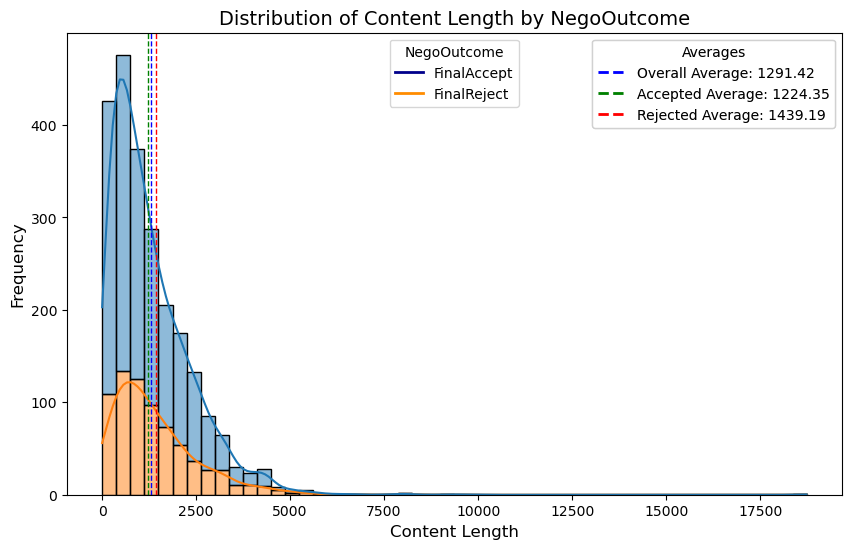

In [20]:
# Plot histogram of content length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Content_Length', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_content_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average content lengths
second_legend = plt.legend(handles=average_lines_content, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Content Length by NegoOutcome', fontsize=14)
plt.xlabel('Content Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
The content length distribution is highly right-skewed, indicating that the majority of contents are relatively short, with only a small proportion of longer entries.
The Accepted Average (<span style="color: teal;">1224.35</span>) is noticeably lower than both the Overall Average (<span style="color: teal;">1291.42</span>) and the Rejected Average (<span style="color: teal;">1439.19</span>). This suggests that shorter content lengths are more likely to lead to acceptance. Rejected content tends to be longer: The higher Rejected Average (<span style="color: teal;">1439.19</span>) indicates that verbosity or excessive content length might be a factor in rejection. The results imply that focusing on concise communication may improve acceptance rates, as shorter content aligns with the typical pattern of successful submissions.
</p>

#### **<span style="color: orange;"> Histogram Sentence Count</span>**

In [21]:
average_lines_sentence = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_sentence_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_sentence_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_sentence_length_rejected:.2f}')
]

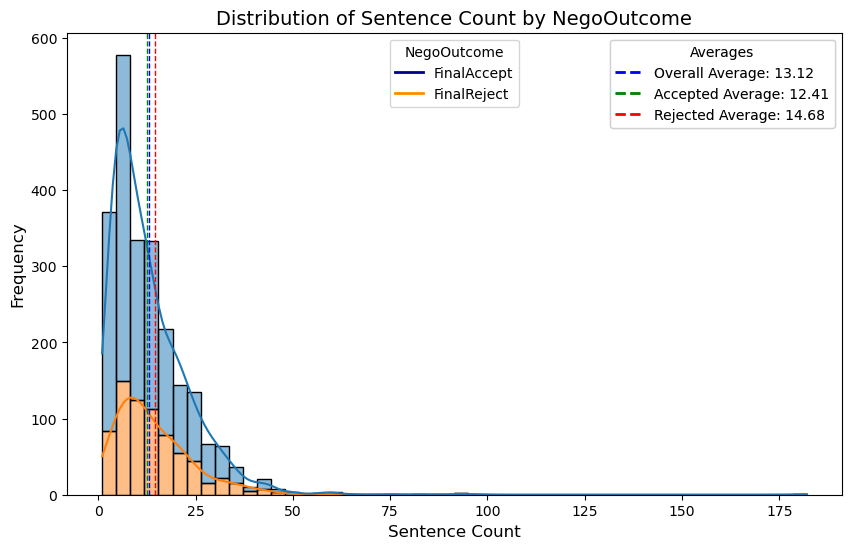

In [22]:
# Plot histogram of sentence count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sentence_Count', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_sentence_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average sentence lengths
second_legend = plt.legend(handles=average_lines_sentence, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Sentence Count by NegoOutcome', fontsize=14)
plt.xlabel('Sentence Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
Like content length, sentence counts follow a right-skewed distribution, with most content having a small number of sentences.
The Accepted Average (<span style="color: teal;">12.41</span>) is lower than the Overall Average (<span style="color: teal;">13.12</span>), while the Rejected Average (<span style="color: teal;">14.68</span>) is higher. This reinforces the trend that concise content, even at the sentence level, is more likely to be accepted.
Key Insight: Rejected content often has slightly more sentences (<span style="color: teal;">14.68</span> on average), compared to accepted content (<span style="color: teal;">12.41</span> on average). This suggests that even a modest increase in sentence count could contribute to rejection, possibly due to reduced clarity or over-explaining.
Aiming for fewer sentences (closer to the Accepted Average) can help ensure that the content is succinct and easy to read.
</p>

####  **<span style="color: orange;">Histogram Word Count </span>**

In [23]:
average_lines_word = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_word_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_word_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_word_length_rejected:.2f}')
]

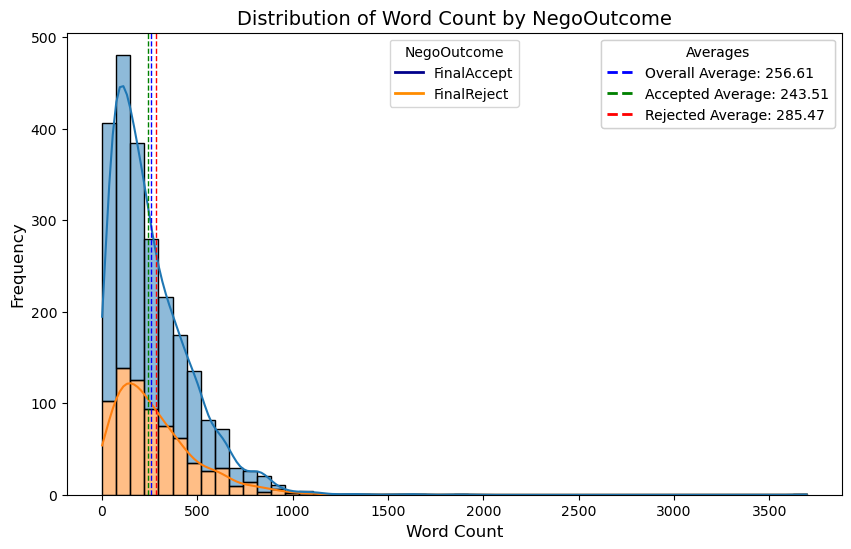

In [24]:
# Plot histogram of word count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Word_Count_nltk', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_word_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average word lengths
second_legend = plt.legend(handles=average_lines_word, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Word Count by NegoOutcome', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
The word count distribution shows a similar pattern of right skew, with most content containing fewer words.
The Accepted Average (<span style="color: teal;">243.51</span>) is lower than both the Overall Average (<span style="color: teal;">256.61</span>) and the Rejected Average (<span style="color: teal;">285.47</span>). This clearly indicates that shorter word counts are associated with higher acceptance rates.
Rejected content tends to be wordier: The Rejected Average (<span style="color: teal;">285.47</span>) suggests that excessive wordiness or lack of precision in content could negatively impact acceptance.
Focusing on concise wording, aiming for a word count closer to the Accepted Average (<span style="color: teal;">243.51</span>), may increase the likelihood of acceptance.
</p>

<p style="text-align: justify;"> 

**General Trends Across all three Graphs**
- **Skewness:** All three metrics (content length, sentence count, and word count) exhibit a **right-skewed distribution**, indicating that most content is relatively short, with a few longer entries.

- **Impact of Length:** Shorter content—measured by length, sentences, or words—tends to be associated with **higher acceptance rates**, while longer content is more likely to be rejected.

- **Practical Insight:** The results suggest that **concise communication** is crucial for content acceptance. Focusing on compact messages and clarity in writing can improve acceptance rates, as shorter content aligns with the typical pattern of successful submissions.

In total we note that all three graphs tend to have the same trend that indicates that they correlate with each other. More sentences lead to more words etc.
</p>

In [25]:
df

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  length  \
0     Dear Mr. Mendel, \nHope you are doing well! \n...    2529   
1     Dear Mr. Novak, \nThank you for reaching out t...    2579   
2     Dear Mr. Mendel, \nThank your kind response – ...    2336   
3     Dear Mr. Novak, \nThank you for your swift rep...    1961   
4     Dear Mr. Mendel, \nThank you for your proposal...    1917   
...                                                 ...     ...   
2327  Dear Chis Meyer,\n \nthank you for your latest...    1755   
2328  Dear Alex Kramer,\nthank you very much for you...    1460   
2329  Dear Chris Meyer,\nthank you for your fast ans...     673   
2330  Dear Alex Kramer,\nI am still very interested ...     969   
2331  Dear Chris Meyer,\n \nI'm so sorry but I can n...     276   

      WordCount_basic  Content_Length  Sentence_Count  Word_Count_nltk  
0                 429            2529              17              470  
1                 439            2579              21              483  
2                 409            2336              15              454  
3                 345            1961              13              381  
4                 343            1917              10              376  
...               ...             ...             ...              ...  
2327              338            1755              21              358  
2328              263            1460              17              294  
2329              133             673              10              144  
2330              171             969               9              191  
2331               54             276               5               60  

[2332 rows x 10 columns]

NegoOutcomeLabel is being included as a new column for later use in our predictions as our target variable since NegoOutcome itself is a string but we need a binary integer variable 0/1.

In [26]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  length  WordCount_basic  \
0  Dear Mr. Mendel, \nHope you are doing well! \n...    2529              429   
1  Dear Mr. Novak, \nThank you for reaching out t...    2579              439   
2  Dear Mr. Mendel, \nThank your kind response – ...    2336              409   
3  Dear Mr. Novak, \nThank you for your swift rep...    1961              345   
4  Dear Mr. Mendel, \nThank you for your proposal...    1917              343   

   Content_Length  Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  
0            2529              17              470                 1  
1            2579              21              483                 1  
2            2336              15              454                 1  
3            1961              13              381                 1  
4            1917              10              376                 1

### **<span style="color: orange;"> Word Cloud  </span>**

In [27]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


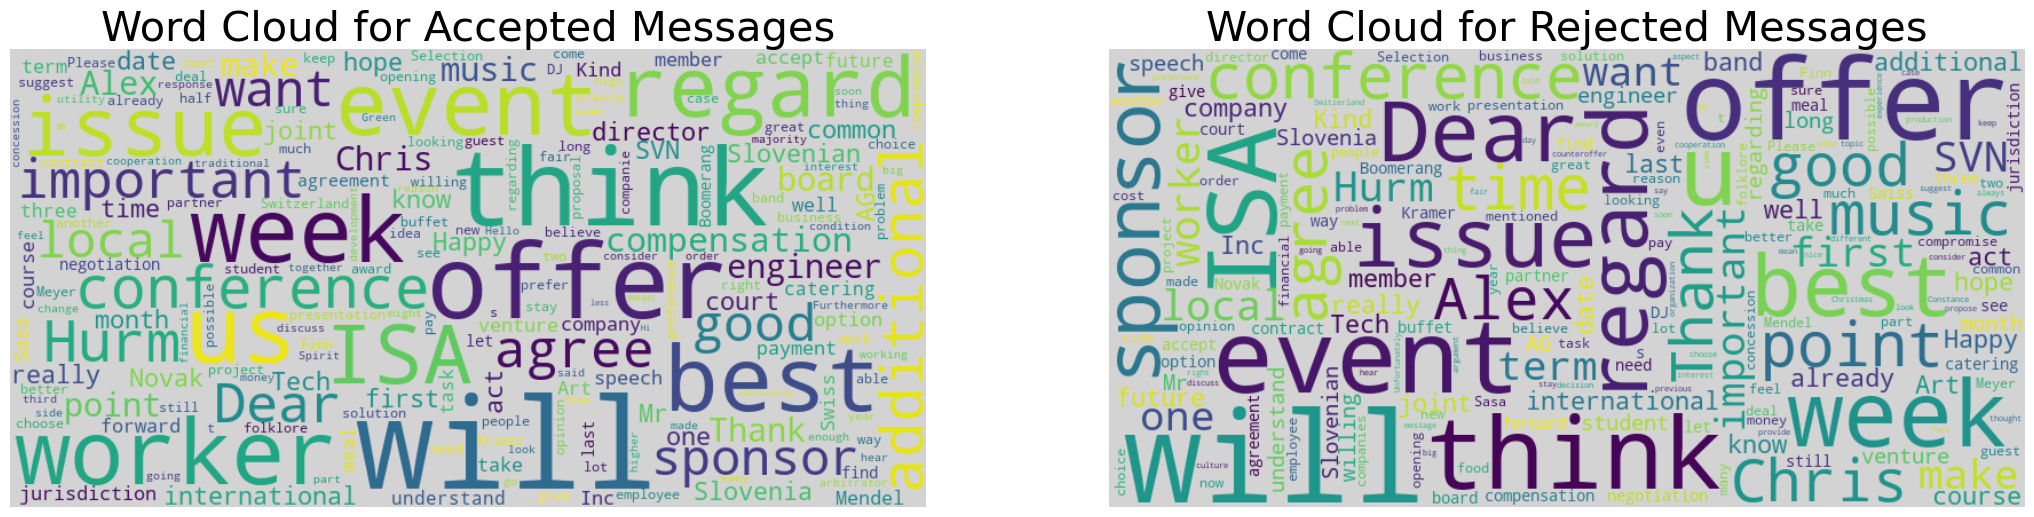

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud separately for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='lightgrey').generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='lightgrey').generate(' '.join(rejected_messages))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 8))

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30)
ax1.axis('off')

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30)
ax2.axis('off')

plt.show()

<p style="text-align: justify;">
Accepted messages focus on actionable and professional terms like "conference," "event," "agree," and "important." Positive words such as "best" and "additional" suggest clarity and prioritization. Names like "Alex" and "Slovenian" indicate personalization, which might contribute to acceptance.
</p>

<p style="text-align: justify;">
Rejected messages contain speculative words like "think," "offer," "want," and "make," reflecting a less decisive tone. Context-specific terms like "music" and "Dear" suggest formality or irrelevant focus, which may lead to rejection.
</p>

<p style="text-align: justify;">
Proper nouns like "Alex" and "Slovenian" may introduce noise and can be filtered out during preprocessing to focus on meaningful terms. Evaluating the relevance of terms like "ISA" or "conference" can further refine the dataset for better analysis.
</p>

## **<span style="color: orange;"> Topic modeling exploration with pyLDAvis </span>**
<p style="text-align: justify;">
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words. Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group. But before getting into topic modeling we have to pre-process our data a little. 
</p>



In [29]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [30]:
import ssl
import nltk

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_df(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_df(df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [32]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [33]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 6,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.020*"would" + 0.014*"ISA" + 0.014*"event" + 0.009*"week" + 0.007*"like" + 0.007*"conference" + 0.006*"point" + 0.005*"offer" + 0.005*"student" + 0.005*"company"'),
 (1,
  '0.024*"offer" + 0.013*"Dear" + 0.011*"would" + 0.010*"n\'t" + 0.009*"regard" + 0.007*"Mendel" + 0.007*"time" + 0.007*"Finn" + 0.006*"Best" + 0.006*"month"'),
 (2,
  '0.017*"would" + 0.016*"worker" + 0.013*"Hurm" + 0.010*"compensation" + 0.010*"additional" + 0.010*"SVN" + 0.009*"offer" + 0.009*"Slovenia" + 0.008*"board" + 0.008*"Tech"'),
 (3,
  '0.006*"utility" + 0.006*"would" + 0.006*"negotiation" + 0.006*"point" + 0.005*"offer" + 0.005*"issue" + 0.005*"SVN" + 0.004*"Dear" + 0.004*"que" + 0.004*"Tech"'),
 (4,
  '0.021*"would" + 0.016*"think" + 0.015*"event" + 0.012*"ISA" + 0.012*"week" + 0.011*"offer" + 0.010*"Alex" + 0.010*"Chris" + 0.009*"conference" + 0.008*"sponsor"'),
 (5,
  '0.018*"would" + 0.013*"issue" + 0.011*"offer" + 0.009*"ISA" + 0.007*"event" + 0.007*"one" + 0.007*"Dear" + 0.007*"point" + 0.007

In [34]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=52081) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=52081) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=52081) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=52081) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarnin

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.148060 -0.007942       1        1  40.781016
2     -0.067586 -0.120226       2        1  40.149587
0      0.094299  0.037930       3        1   9.272384
5      0.041260  0.012381       4        1   6.141115
1     -0.086328 -0.021644       5        1   2.939928
3     -0.129705  0.099501       6        1   0.715970, topic_info=              Term         Freq        Total Category  logprob  loglift
475          offer  2675.000000  2675.000000  Default  30.0000  30.0000
169          would  4927.000000  4927.000000  Default  29.0000  29.0000
167         worker  1730.000000  1730.000000  Default  28.0000  28.0000
2604         event  2093.000000  2093.000000  Default  27.0000  27.0000
3             Dear  1543.000000  1543.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
40            best     4.318449  1134.147423   Topic6  -6.0773  -0.6315
114         option     4.040724   727.377316   Topic6  -6.1438  -0.2537
278   compensation     4.159992  1096.828060   Topic6  -6.1147  -0.6354
75            find     3.844659   707.147817   Topic6  -6.1935  -0.2753
59        director     3.764106   805.569480   Topic6  -6.2147  -0.4268

[466 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1268      1  0.102387     100
1268      2  0.511937     100
1268      3  0.051194     100
1268      4  0.025597     100
1268      5  0.179178     100
...     ...       ...     ...
2028      2  0.031348   young
2028      3  0.365721   young
2028      4  0.041797   young
2028      5  0.010449   young
3135      6  0.569745  última

[1108 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 6, 2, 4])

The topic modeling analysis reveals distinct themes across the text data: 

- Topic 1 (47.3% of tokens) is heavily focused on event planning and organization, with key terms like "event," "conference," "week," and "offer," alongside proper nouns like "ISA" and "Alex," which suggest context-specific participants or entities. The frequent use of "would" and "think" highlights speculative or future-oriented language. 

- Topic 2 (38.5% of tokens) centers around employment and compensation, with terms like "worker," "compensation," and "additional" dominating. References to specific regions ("Slovenia," "SVN") and names ("Hurm") indicate localized or regional aspects of the topic. Similarly, "would" appears frequently, reflecting proposal-driven discussions.

- Topic 3 (5.8% of tokens) focuses on formal communication in negotiations, characterized by words like "offer," "Dear," "regard," and "agreement." This topic appears tied to reaching outcomes or decisions, with terms such as "accept" and "negotiation" reinforcing its formal tone.

- Topic 4 (5.5% of tokens) is related to event planning and problem-solving, similar to Topic 1, but with an emphasis on resolving key issues, as indicated by terms like "best" and "issue." Proper nouns like "Chris" and "ISA" again suggest specific participants or entities.

- Topics 5 & 6 are to small to consider

Across all topics, the consistent presence of "would" points to the speculative nature of the communications. Proper nouns like "ISA," "Alex," "Slovenia," and "Chris" highlight context-specific discussions, which could be filtered during preprocessing, since they are not relevant.

### **<span style="color: orange;"> N-gram exploration </span>**
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

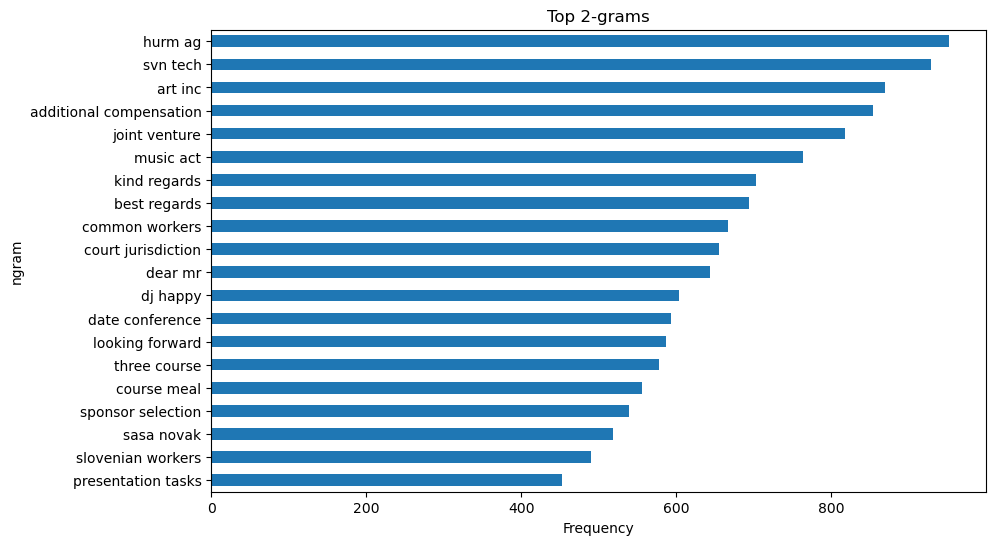

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=2):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 2)  # Example for bigrams


The chart shows the top 2-grams (frequent word pairs) in a text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation". The bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). The data likely comes from corporate or legal documents, with some references to formal emails or correspondence. We will also try out trinomial freauence to test whether we will find out more pattern and analyze the data further.

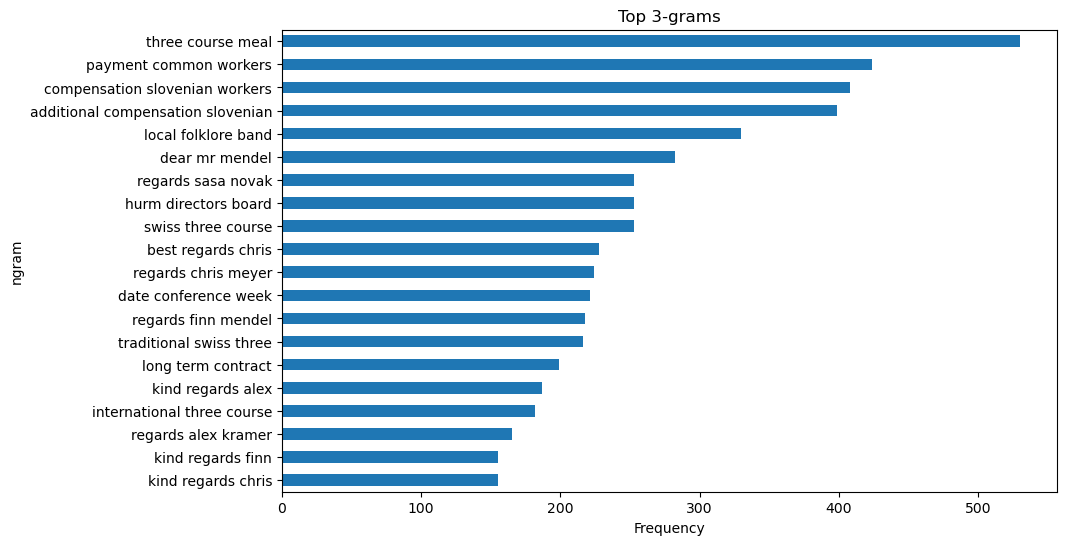

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 3)  # Example for trigrams


Both frequencies analysis show us different patterns. The binomial more easier and faster pattern that are easier to identify and trinomial helps us understand the context more since it goes fruther into the data.

## **<span style="color: orange;"> Named Entity Recognitions </span>**

In [37]:
%pip install spacy

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=52081) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [38]:
#donwload the model separetely so it can be imported in the next cell
!python -m spacy download en_core_web_sm  


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=52081) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
# Named entity recognition
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")

Model loaded successfully!


In [40]:

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message
sample_text = df['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text)

spaCy model loaded successfully!


/opt/anaconda3/lib/python3.12/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


<p style="text-align: justify;">
As we can see above, the snippet of one negotiation message is marked by named entity types. This marking helps in identifying and categorizing different entities within the message. It also shows us the general structure of a negotiation message, highlighting key components such as names, dates, and locations. Further, the frequency and distribution of named entities should be observed in order to comprehend the effect and amount of each entity. This analysis can provide insights into the common elements and patterns in negotiation messages, which can be useful for various NLP tasks.
</p>

In [41]:
import spacy
from collections import defaultdict
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    for text in dataset['Content']:
        doc = nlp(text)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities

# Extract entities from the dataset
entities = extract_entities_from_dataset(df)

# Convert entities to a DataFrame for better readability
entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))

# Display the extracted entities grouped by type
print(entity_df)


spaCy model loaded successfully!
                   PERSON        NORP                        ORG ORDINAL  \
0             ALEX Kramer   slovanian                  Music Art   fifth   
1    Alex Kramer Catering  Frandorian         Dear / Chris Meyer  second   
2                 Adriaan     Swedish     the Pop Band Free Life    06th   
3            Best Regarts    businese           CheersSasa Novak     5th   
4                    Kinn      German  The Place of Jurisdiction   Third   
..                    ...         ...                        ...     ...   
911                   NaN         NaN                        NaN     NaN   
912                   NaN         NaN                        NaN     NaN   
913                   NaN         NaN                        NaN     NaN   
914                   NaN         NaN                        NaN     NaN   
915                   NaN         NaN                        NaN     NaN   

       CARDINAL                    DATE          GPE  

Here we can see all of identified named entities in the negotiation messages.

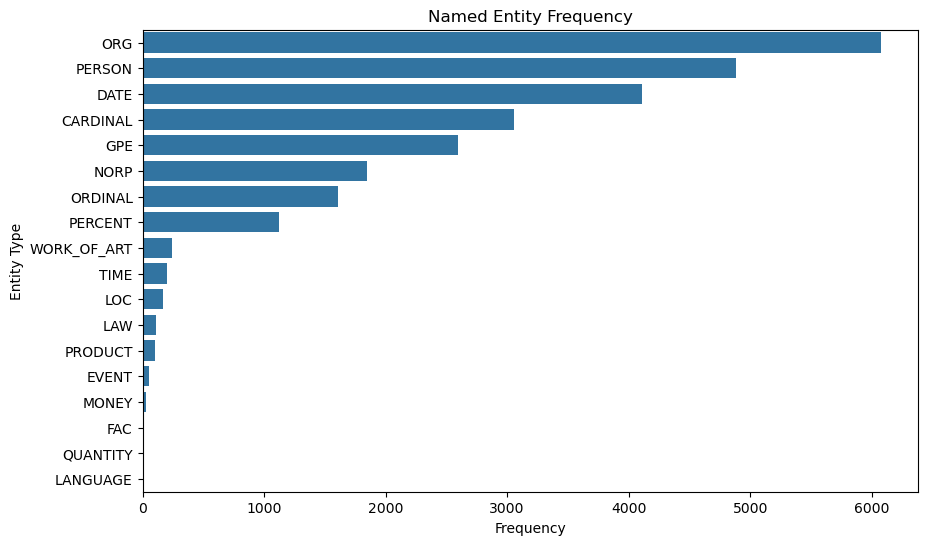

In [42]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

# Apply the ner function to the 'Content' column and flatten the results
ent = df['Content'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]  # Flatten the list of lists

# Count the occurrences of each entity type
counter = Counter(ent)
count = counter.most_common()

# Visualize the entity frequencies
x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x)
plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.title('Named Entity Frequency')
plt.show()


<p style="text-align: justify;">
The named entity frequency analysis shows that the text is dominated by ORG (organizations), PERSON (individuals), and DATE, with nearly 6,000, 4,000, and 3,500 mentions respectively. These indicate a focus on organizations, people, and time-related references. Moderately frequent entities like CARDINAL, GPE (geopolitical entities), and NORP (nationalities, political groups) add context about numbers and locations. Less frequent entities such as LAW, PRODUCT, and EVENT suggest niche mentions, while minimal occurrences of MONEY and QUANTITY indicate limited focus on financial or quantitative data. For NLP tasks, key categories like ORG, PERSON, and DATE should be dropped, since they are not contributing to the underlaying meaning of the messages.
</p>

## **<span style="color: orange;"> Part-of-Speech </span>**
Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy

spaCy model loaded successfully!


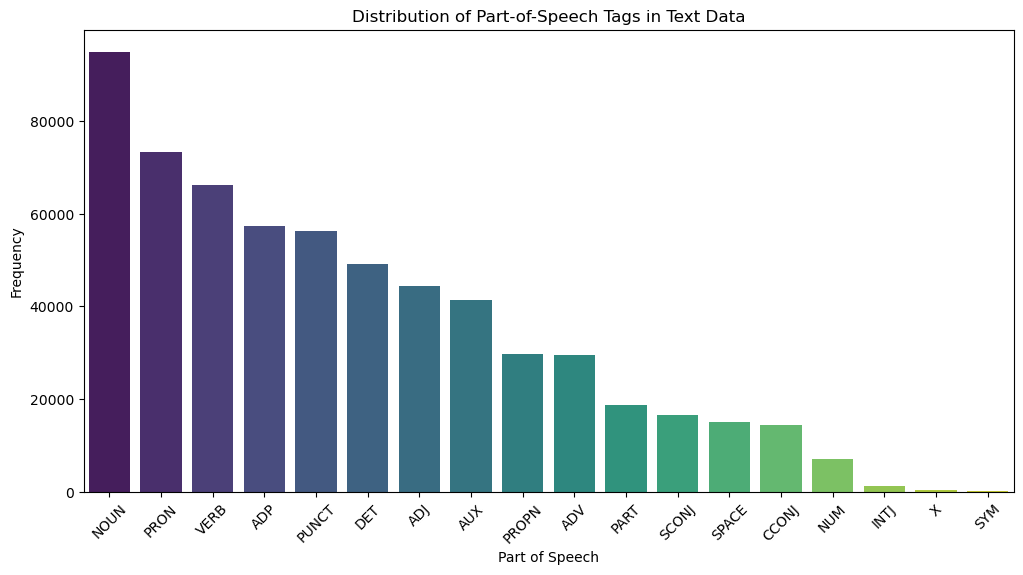

In [43]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply the POS tagging function to the text data
pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

# Flatten the list of lists into a single list of POS tags
pos_tags = [tag for sublist in pos_tags for tag in sublist]

# Count the occurrences of each POS tag
pos_counter = Counter(pos_tags)
pos_counts = pos_counter.most_common()

# Prepare the data for visualization
x, y = zip(*pos_counts)

# Visualize the distribution of POS tags
plt.figure(figsize=(12, 6))
sns.barplot(x=list(x), y=list(y), palette="viridis")
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Distribution of Part-of-Speech Tags in Text Data')
plt.xticks(rotation=45)
plt.show()


### Observations

*Dominant POS Tags:*

- NOUN has the highest frequency, followed by PRON (pronouns) and VERB. These tags are essential as they contribute to the core meaning and structure of the text.
- Moderate Frequency Tags: Tags like ADP (adpositions like prepositions), PUNCT (punctuation), DET (determiners), ADJ (adjectives), and AUX (auxiliary verbs) also appear frequently. They provide context, structure, and grammatical clarity.
- Low Frequency Tags: SYM (symbols), INTJ (interjections), X (miscellaneous), and NUM (numerals) are rare, which may contribute less to the semantic analysis of the text.


*What Can Stay*
- NOUN, VERB, ADJ, PRON, ADP: These tags are critical for understanding the core meaning and relationships in the text.
- AUX, DET, ADV: These contribute to grammatical structure and provide important contextual information.
- PUNCT: While punctuation may seem less critical, it often indicates sentence boundaries and tone, which can be useful for tasks like sentence segmentation or sentiment analysis.

*What Can Go*
- SYM (symbols): Symbols are usually not meaningful in many NLP tasks and can be removed unless specific to the context (e.g., technical or financial data).
- INTJ (interjections): Interjections rarely contribute significantly to the overall analysis and can be removed unless the dataset is focused on conversational or emotional expressions.
- SPACE: These are non-semantic and can be safely excluded during preprocessing.
- X (miscellaneous): This tag is often used for tokens that don't fit standard POS categories. It may not add value and can be excluded.


## **<span style="color: orange;"> Sentiment Analysis  </span>**

In [44]:
!pip install textblob

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=52081) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [45]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment)

# Categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

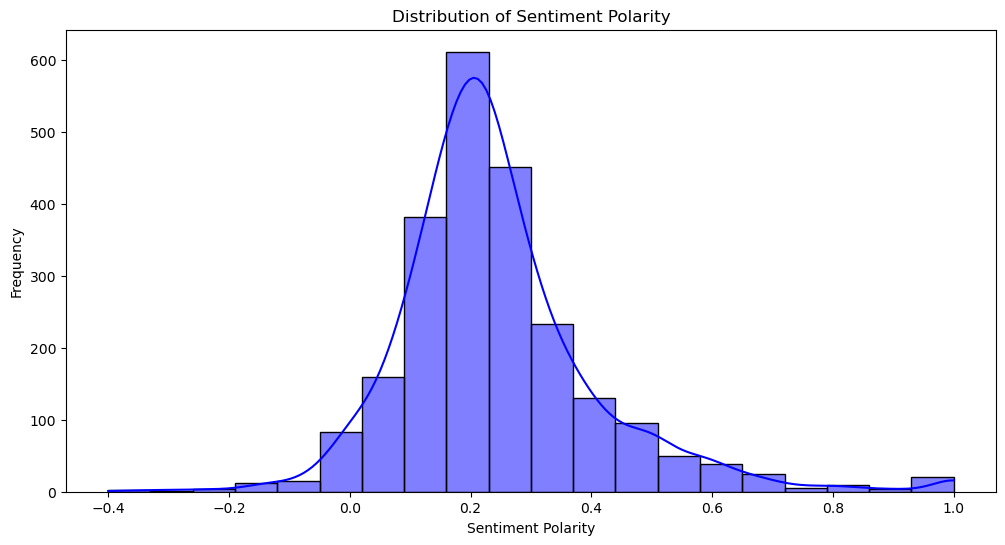

In [46]:
# Visualize the distribution of sentiment polarity scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Polarity Scores:
-1 to 0: Negative sentiment. The closer the score is to -1, the more negative the text is.
0: Neutral sentiment. Text that is neither strongly positive nor strongly negative.
0 to +1: Positive sentiment. The closer the score is to +1, the more positive the text is.

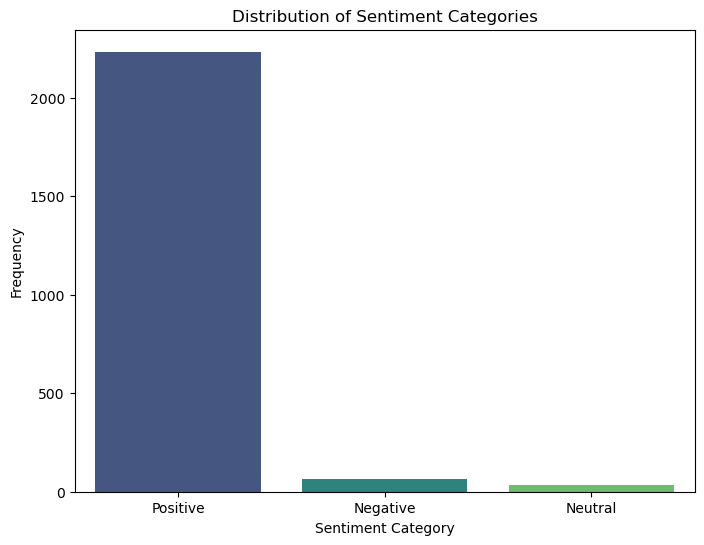

In [47]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='SentimentCategory', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

# EX post analysis

In [48]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
%pip install nltk
import nltk
%pip install --upgrade pandas
%pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [49]:
# Read xsl file
df = pd.read_excel('df_complete_cleansing.xlsx')


In [50]:
df # 2332 observations and 5 columns

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  Content_Length  \
0     hope well management company agreed building f...            2529   
1     reaching mei apologize slight delay getting ba...            2579   
2     r kind response need hurry guess face daily fi...            2336   
3     swift reply read set proposal discussed collea...            1961   
4     proposal effort far seems getting close resolv...            1917   
...                                                 ...             ...   
2327  latest offer point completely let u take corpo...            1755   
2328  much latest offer happy could already reached ...            1460   
2329  meyer fast answer happy found solution issue n...             673   
2330  still interested coming joint result neverthel...             969   
2331  sorry accept less understand argument like las...             276   

      Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
0                 17              470                 1   0.213699   
1                 21              483                 1   0.165002   
2                 15              454                 1   0.222533   
3                 13              381                 1   0.160333   
4                 10              376                 1   0.122500   
...              ...              ...               ...        ...   
2327              21              358                 0   0.285340   
2328              17              294                 0   0.282807   
2329              10              144                 0   0.251786   
2330               9              191                 0   0.163158   
2331               5               60                 0   0.056771   

     SentimentCategory  
0             Positive  
1             Positive  
2             Positive  
3             Positive  
4             Positive  
...                ...  
2327          Positive  
2328          Positive  
2329          Positive  
2330          Positive  
2331          Positive  

[2332 rows x 11 columns]

#####  **<span style="color: orange;">Missing values and Duplicates</span>**

In [51]:
# Check for missing values
df.isnull().sum()

SenderID             0
ReceiverID           0
ActionType           0
NegoOutcome          0
Content              4
Content_Length       0
Sentence_Count       0
Word_Count_nltk      0
NegoOutcomeLabel     0
Sentiment            0
SentimentCategory    0
dtype: int64

In [52]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df
duplicates = df[df.duplicated()]
duplicates

SenderID  ReceiverID    ActionType  NegoOutcome  \
215        965         966  Counteroffer  FinalAccept   
270       1105        1106  Counteroffer  FinalReject   
400       1441        1442  Counteroffer  FinalReject   
470       1833        1834   FinalAccept  FinalAccept   
731       3037        3038  Counteroffer  FinalAccept   
929       3877        3878  Counteroffer  FinalAccept   
1555        48          47  Counteroffer  FinalAccept   
1747        48          47  Counteroffer  FinalAccept   

                                                Content  Content_Length  \
215   glad side making continuous effort reaching ag...             341   
270   assure misunderstanding would prefer jurisdict...            2311   
400   sending offer although quite surprised offer m...             499   
470   nova official acceptance joint venture thanks ...             214   
731   would really like close deal would nt successf...             460   
929   course agree director board time engineer slov...             595   
1555  sorry late response wa busy thanks sending off...            2752   
1747  sorry late response wa busy thanks sending off...            2752   

      Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
215                5               70                 1   0.466667   
270               20              443                 0   0.139425   
400                5              102                 0   0.250000   
470                6               47                 1   0.600000   
731                5               98                 1   0.590000   
929                8              118                 1  -0.151667   
1555              26              520                 1   0.215378   
1747              26              520                 1   0.215378   

     SentimentCategory  
215           Positive  
270           Positive  
400           Positive  
470           Positive  
731           Positive  
929           Negative  
1555          Positive  
1747          Positive

<p style="text-align: justify;">
The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that may be considered an preprocessed to prevent errors in the data cleansing part of this project.
</p>

In [53]:
import pandas as pd

# Count rows with missing values
na_rows = df[df['Content'].isna()]
print(na_rows)
import pandas as pd


# Step 1: Remove rows with NaN in Content
df = df.dropna(subset=['Content'])

# Step 2: Remove rows with empty strings or insignificant content in Content
def is_insignificant_content(content):
    return content.strip() == '' or content.strip() == '.' or len(content.split()) == 1

df = df[~df['Content'].apply(is_insignificant_content)]


      SenderID  ReceiverID    ActionType  NegoOutcome Content  Content_Length  \
552       2057        2058   FinalAccept  FinalAccept     NaN              29   
857       3457        3458  Counteroffer  FinalAccept     NaN               1   
1247       103         104         Offer  FinalAccept     NaN               8   
1404       133         134   FinalReject  FinalReject     NaN               1   

      Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
552                1                5                 1        1.0   
857                1                1                 1        0.0   
1247               1                3                 1        0.5   
1404               1                1                 0        0.0   

     SentimentCategory  
552           Positive  
857            Neutral  
1247          Positive  
1404           Neutral  


## **<span style="color: orange;"> Analyzing text statistics</span>**

For starters, we will begin with standard exploration techniques in NLP data epxloration this includes the following:

- **<span style="color: teal;">word frequency analysis</span>**
- **<span style="color: teal;">sentence length analysis</span>**
- **<span style="color: teal;">average word length analysis</span>**

The insights to these standard data will help us identify any patterns that we may consider preprocess further. We want to identify important features of the content/text data.

In [54]:
# Check the length of the content
df["Content_length_cleansed"] = df["Content"].str.len()
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  hope well management company agreed building f...            2529   
1  reaching mei apologize slight delay getting ba...            2579   
2  r kind response need hurry guess face daily fi...            2336   
3  swift reply read set proposal discussed collea...            1961   
4  proposal effort far seems getting close resolv...            1917   

   Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
0              17              470                 1   0.213699   
1              21              483                 1   0.165002   
2              15              454                 1   0.222533   
3              13              381                 1   0.160333   
4              10              376                 1   0.122500   

  SentimentCategory  Content_length_cleansed  
0          Positive                     1604  
1          Positive                     1400  
2          Positive                     1433  
3          Positive                     1042  
4          Positive                     1096

In [55]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount_cleansed'] = df['Content'].apply(word_count)
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  hope well management company agreed building f...            2529   
1  reaching mei apologize slight delay getting ba...            2579   
2  r kind response need hurry guess face daily fi...            2336   
3  swift reply read set proposal discussed collea...            1961   
4  proposal effort far seems getting close resolv...            1917   

   Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
0              17              470                 1   0.213699   
1              21              483                 1   0.165002   
2              15              454                 1   0.222533   
3              13              381                 1   0.160333   
4              10              376                 1   0.122500   

  SentimentCategory  Content_length_cleansed  WordCount_cleansed  
0          Positive                     1604                 214  
1          Positive                     1400                 189  
2          Positive                     1433                 190  
3          Positive                     1042                 140  
4          Positive                     1096                 148

In [56]:
df["NegoOutcome"].value_counts() 

NegoOutcome
FinalAccept    1599
FinalReject     725
Name: count, dtype: int64

<p style="text-align: justify;">
After dropiing the  empty rows the final rejectiosn and accepts drop.
</p>

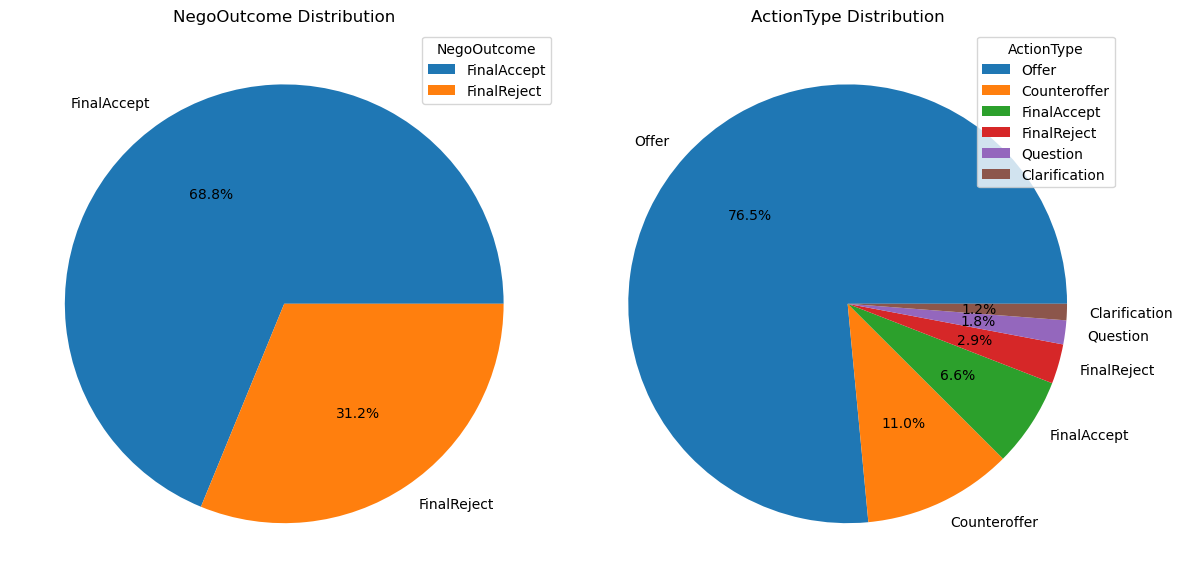

In [57]:
import matplotlib.pyplot as plt

#Plot the pie chart for NegoOutcomeLabel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(df['NegoOutcome'].value_counts(), labels=df['NegoOutcome'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="NegoOutcome", loc="best")
plt.title('NegoOutcome Distribution')

#Plot the pie chart for ActionType
plt.subplot(1, 2, 2)
plt.pie(df['ActionType'].value_counts(), labels=df['ActionType'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="ActionType", loc="best")
plt.title('ActionType Distribution')

#Show the plots
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
minimal change since the dropping of empty rows influence very little the percentags there is a change of 0.2 percent in offers and 0.1 percent in finalaccepts and rejects</p>

In [58]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

'reaching mei apologize slight delay getting back colleague midst preparing upcoming joint venture could nt excited already know name mendes correspondence period time solidifying agreement harm ag respectively read proposal open issue joint venture however thought discussed explanation director agreed member simple majority power believe member harm ag suitable venture director extremely experienced completed multiple joint venture country however need mentioned previously deal local authority partner successfully engineer fully agree send engineer svn tech interest push development green spirit engine however prior commitment local production fact far home propose work together improve product common worker agree u continue paying worker however believe worker specially hired joint venture paid equal term company additionally would appreciate much commonly hired worker could paid worker heard good reputation providing great working condition worker salary average however harm ag beli

In [59]:
# Print rejected message
rejected_messages.values[1]

'pleased hear happy joint venture harm ag would like advance stimulating point discussion u make partnership reality board director would like harm ag seat board since important company carry vision company throughout project till final stage course help representative board provide support knowhow realize vision engineer stay slovenia impossible stay long due production commitment ensure success joint project needed engineer stay slovenia maximum help start project eventually train staff additional compensation worker agree paid proposed remaining issue would like propose jurisdiction handled court propose pay wage additional staff hired project paid equal term bus harm ag however avoid unnecessary administrative effort would like wage payment hired worker would administrated please question concern regarding position please hesitate ask important u together reach mutual understanding party benefit joint venture'

In [60]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1599, 725)

<p style="text-align: justify;">
Until now, we have noted that the dimensions are the same, but with minimal change of 0.1 percentage less.
</p>

## **<span style="color: orange;">Overall important KPI's</span>**

# summary statistics that shows all releveant KPIs for gesamt word count, percentages etc.

In [61]:
# Overall word count for the whole dataset
accepted_word_count_sum = accepted_messages.apply(word_count).sum()
rejected_word_count_sum = rejected_messages.apply(word_count).sum()


# Overall sum of all words
total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

accepted_word_count_sum, rejected_word_count_sum, total_word_count_sum


(153914, 82057, 235971)

Its clearly a big difference because there are half of the word from before a change of -50%

In [62]:
# Check if the sum of the two counts is equal to the total number of rows in the df
df.shape

(2324, 13)

### **<span style="color: orange;">Calculating Average Lengths</span>**

In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

# Adding aditional parameters to the current df based on the nltk library
df['Content_Length_cleansed'] = df['Content'].apply(len)
df['Sentence_Count_cleansed'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
df['Word_Count_nltk_cleansed'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

# Calculate averages
average_content_length_cleansed = df['Content_Length_cleansed'].mean()
average_sentence_length_cleansed = df['Content_Length_cleansed'].sum() / df['Sentence_Count_cleansed'].sum()
average_word_length_cleansed = df['Content_Length_cleansed'].sum() / df['Word_Count_nltk_cleansed'].sum()

print(f"Average Content Length: {average_content_length_cleansed}")
print(f"Average Sentence Length: {average_sentence_length_cleansed}")
print(f"Average Word Length: {average_word_length_cleansed}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Content Length: 729.7839931153184
Average Sentence Length: 729.7839931153184
Average Word Length: 7.187278313380655


Now the content and sentence length are the same since after removing the "." of all messages of the content the data is one big sentence for each message so dont be surprised make sense that thus the average word length is also higher than before.

### **<span style="color: orange;"> Plotting average lengths</span>**
<p style="text-align: justify;">
The following plots show the distribution of content length in the dataset. The dashed line indicates the average content length, this shouls serve just as a simple visualization of our calculated averages form above but with the focus on the distribution to make clear in which intervals we are moving.
</p>

In [64]:
# We Calculate the averages for accepted and rejected content to include them into  our graphics
average_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length_cleansed'].mean()
average_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length_cleansed'].mean()
average_sentence_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count_cleansed'].mean()
average_sentence_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count_cleansed'].mean()
average_word_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk_cleansed'].mean()
average_word_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk_cleansed'].mean()

# Calculate overall averages
average_content_length_overall = df['Content_Length_cleansed'].mean()
average_sentence_length_overall = df['Sentence_Count_cleansed'].mean()
average_word_length_overall = df['Word_Count_nltk_cleansed'].mean()

In [65]:
# Defining legend markers for the two specific negotiation outcomes
outcome_lines = [
    Line2D([0], [0], color='darkblue', linestyle='solid', linewidth=2, label='FinalAccept'),
    Line2D([0], [0], color='darkorange', linestyle='solid', linewidth=2, label='FinalReject')
]

#### **<span style="color: orange;">Histogram Content Length</span>**

In [66]:
# Defining legend markers for the averages
average_lines_content = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_content_length_cleansed:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_content_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_content_length_rejected:.2f}')
]

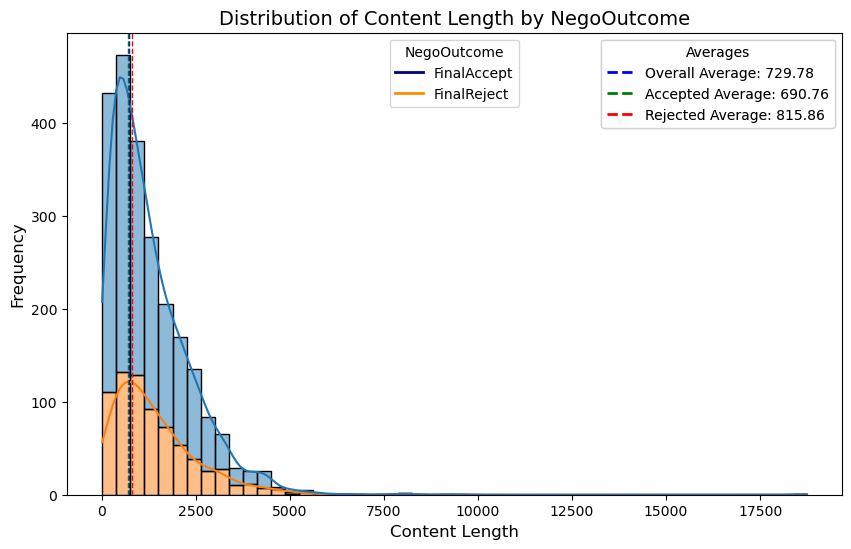

In [67]:
# Plot histogram of content length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Content_Length', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_content_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average content lengths
second_legend = plt.legend(handles=average_lines_content, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Content Length by NegoOutcome', fontsize=14)
plt.xlabel('Content Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
average did get smaller and thus moved more to the left side of the graph but the general aspect is that it remained similar from the weighting
</p>

#### **<span style="color: orange;"> Histogram Sentence Count</span>**

In [68]:
average_lines_sentence = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_sentence_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_sentence_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_sentence_length_rejected:.2f}')
]

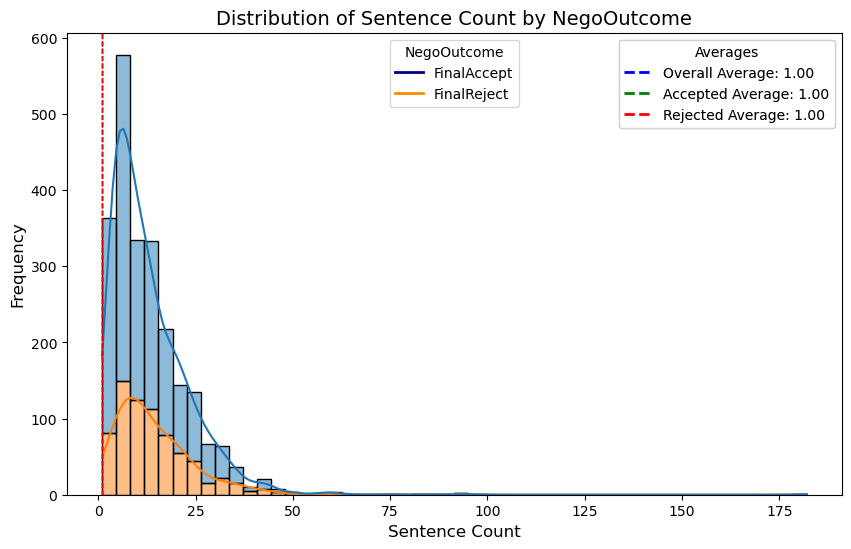

In [69]:
# Plot histogram of sentence count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sentence_Count', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_sentence_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average sentence lengths
second_legend = plt.legend(handles=average_lines_sentence, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Sentence Count by NegoOutcome', fontsize=14)
plt.xlabel('Sentence Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
Like content length, sentence counts follow a right-skewed distribution, with most content having a small number of sentences.
The Accepted Average (<span style="color: teal;">12.41</span>) is lower than the Overall Average (<span style="color: teal;">13.12</span>), while the Rejected Average (<span style="color: teal;">14.68</span>) is higher. This reinforces the trend that concise content, even at the sentence level, is more likely to be accepted.
Key Insight: Rejected content often has slightly more sentences (<span style="color: teal;">14.68</span> on average), compared to accepted content (<span style="color: teal;">12.41</span> on average). This suggests that even a modest increase in sentence count could contribute to rejection, possibly due to reduced clarity or over-explaining.
Aiming for fewer sentences (closer to the Accepted Average) can help ensure that the content is succinct and easy to read.
</p>

####  **<span style="color: orange;">Histogram Word Count </span>**

In [70]:
average_lines_word = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_word_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_word_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_word_length_rejected:.2f}')
]

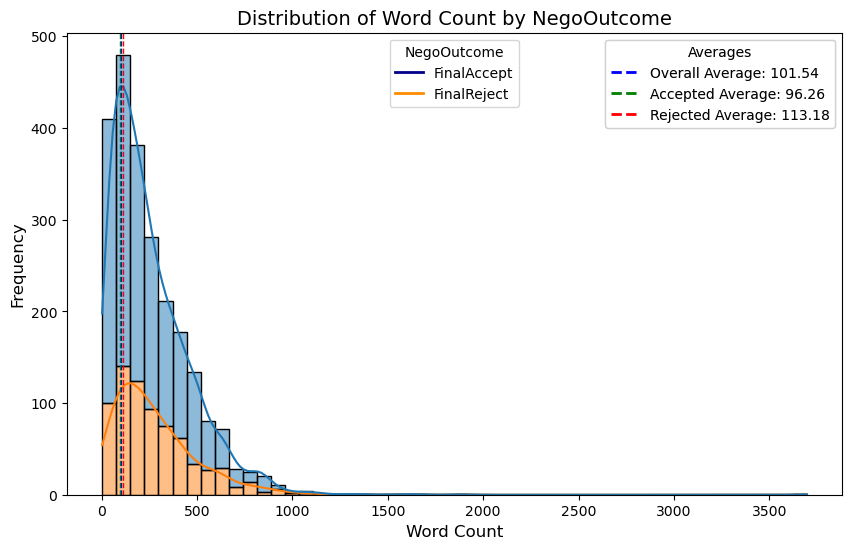

In [71]:
# Plot histogram of word count
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Word_Count_nltk', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_word_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average word lengths
second_legend = plt.legend(handles=average_lines_word, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Word Count by NegoOutcome', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
Averages now are definitly smaller than before
</p>

In [72]:
df

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  Content_Length  \
0     hope well management company agreed building f...            2529   
1     reaching mei apologize slight delay getting ba...            2579   
2     r kind response need hurry guess face daily fi...            2336   
3     swift reply read set proposal discussed collea...            1961   
4     proposal effort far seems getting close resolv...            1917   
...                                                 ...             ...   
2327  latest offer point completely let u take corpo...            1755   
2328  much latest offer happy could already reached ...            1460   
2329  meyer fast answer happy found solution issue n...             673   
2330  still interested coming joint result neverthel...             969   
2331  sorry accept less understand argument like las...             276   

      Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
0                 17              470                 1   0.213699   
1                 21              483                 1   0.165002   
2                 15              454                 1   0.222533   
3                 13              381                 1   0.160333   
4                 10              376                 1   0.122500   
...              ...              ...               ...        ...   
2327              21              358                 0   0.285340   
2328              17              294                 0   0.282807   
2329              10              144                 0   0.251786   
2330               9              191                 0   0.163158   
2331               5               60                 0   0.056771   

     SentimentCategory  Content_length_cleansed  WordCount_cleansed  \
0             Positive                     1604                 214   
1             Positive                     1400                 189   
2             Positive                     1433                 190   
3             Positive                     1042                 140   
4             Positive                     1096                 148   
...                ...                      ...                 ...   
2327          Positive                      903                 133   
2328          Positive                      958                 136   
2329          Positive                      348                  54   
2330          Positive                      605                  81   
2331          Positive                       84                  13   

      Content_Length_cleansed  Sentence_Count_cleansed  \
0                        1604                        1   
1                        1400                        1   
2                        1433                        1   
3                        1042                        1   
4                        1096                        1   
...                       ...                      ...   
2327                      903                        1   
2328                      958                        1   
2329                      348                        1   
2330                      605                        1   
2331                       84                        1   

      Word_Count_nltk_cleanse

NegoOutcomeLabel is being included as a new column for later use in our predictions as our target variable since NegoOutcome itself is a string but we need a binary integer variable 0/1.

In [73]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  hope well management company agreed building f...            2529   
1  reaching mei apologize slight delay getting ba...            2579   
2  r kind response need hurry guess face daily fi...            2336   
3  swift reply read set proposal discussed collea...            1961   
4  proposal effort far seems getting close resolv...            1917   

   Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
0              17              470                 1   0.213699   
1              21              483                 1   0.165002   
2              15              454                 1   0.222533   
3              13              381                 1   0.160333   
4              10              376                 1   0.122500   

  SentimentCategory  Content_length_cleansed  WordCount_cleansed  \
0          Positive                     1604                 214   
1          Positive                     1400                 189   
2          Positive                     1433                 190   
3          Positive                     1042                 140   
4          Positive                     1096                 148   

   Content_Length_cleansed  Sentence_Count_cleansed  Word_Count_nltk_cleansed  
0                     1604                        1                       214  
1                     1400                        1                       189  
2                     1433                        1                       190  
3                     1042                        1                       140  
4                     1096                        1                       148

### **<span style="color: orange;"> Word Cloud  </span>**

In [74]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


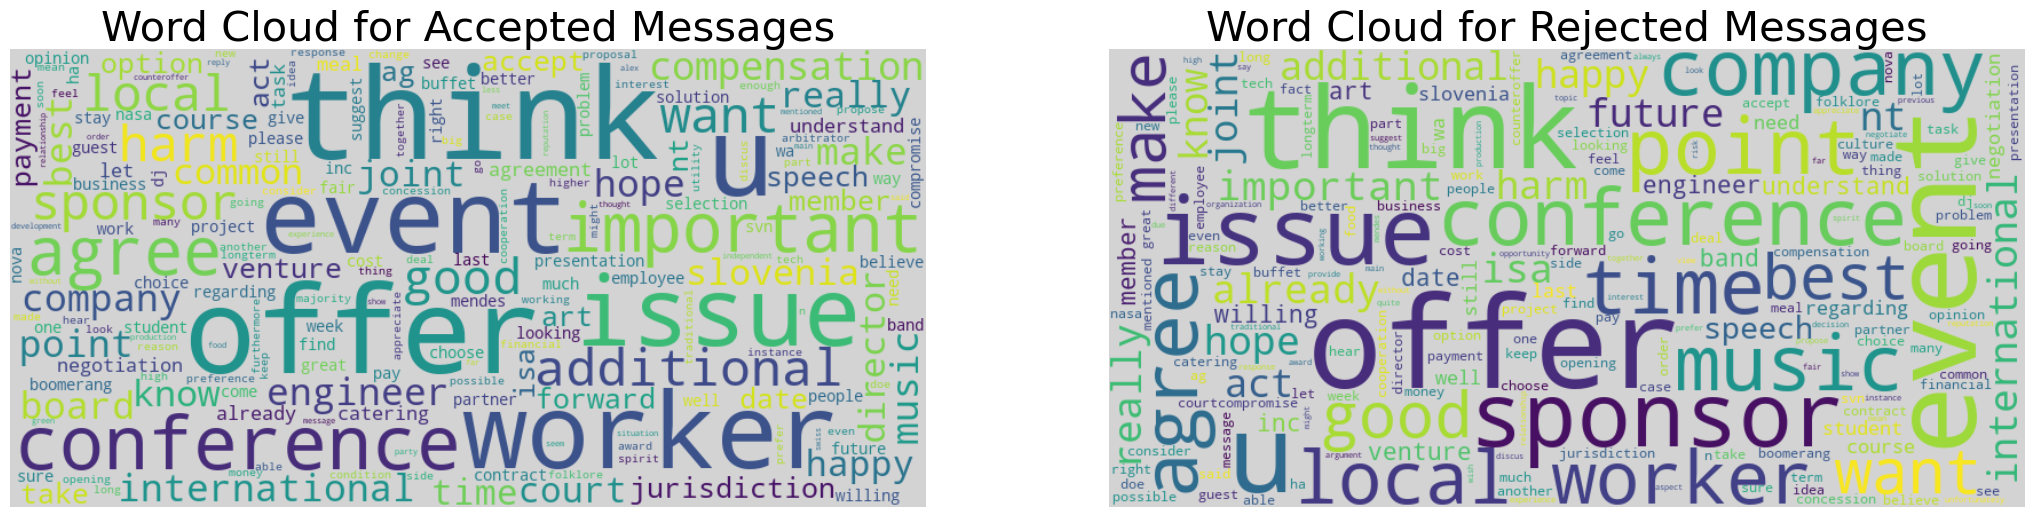

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud separately for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='lightgrey').generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='lightgrey').generate(' '.join(rejected_messages))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 8))

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30)
ax1.axis('off')

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30)
ax2.axis('off')

plt.show()

<p style="text-align: justify;">
Accepted messages focus on actionable and professional terms like "conference," "event," "agree," and "important." Positive words such as "best" and "additional" suggest clarity and prioritization. Names like "Alex" and "Slovenian" indicate personalization, which might contribute to acceptance.
</p>

<p style="text-align: justify;">
Rejected messages contain speculative words like "think," "offer," "want," and "make," reflecting a less decisive tone. Context-specific terms like "music" and "Dear" suggest formality or irrelevant focus, which may lead to rejection.
</p>

<p style="text-align: justify;">
Proper nouns like "Alex" and "Slovenian" may introduce noise and can be filtered out during preprocessing to focus on meaningful terms. Evaluating the relevance of terms like "ISA" or "conference" can further refine the dataset for better analysis.
</p>

## **<span style="color: orange;"> Topic modeling exploration with pyLDAvis </span>**
<p style="text-align: justify;">
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words. Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group. But before getting into topic modeling we have to pre-process our data a little. 
</p>



In [76]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [77]:
import ssl
import nltk

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_df(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_df(df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tarkanyildirim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [79]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [80]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 6,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.025*"offer" + 0.014*"would" + 0.012*"accept" + 0.009*"best" + 0.008*"last" + 0.008*"agreement" + 0.008*"hope" + 0.008*"think" + 0.007*"negotiation" + 0.007*"really"'),
 (1,
  '0.036*"offer" + 0.011*"make" + 0.010*"negotiation" + 0.009*"would" + 0.009*"accept" + 0.008*"issue" + 0.008*"think" + 0.008*"last" + 0.008*"best" + 0.007*"find"'),
 (2,
  '0.020*"would" + 0.016*"offer" + 0.012*"sponsor" + 0.012*"issue" + 0.011*"event" + 0.010*"conference" + 0.009*"think" + 0.008*"like" + 0.007*"presentation" + 0.007*"task"'),
 (3,
  '0.030*"would" + 0.020*"event" + 0.017*"conference" + 0.016*"think" + 0.011*"sponsor" + 0.011*"music" + 0.010*"local" + 0.009*"offer" + 0.008*"isa" + 0.008*"international"'),
 (4,
  '0.020*"think" + 0.017*"would" + 0.016*"event" + 0.012*"local" + 0.011*"also" + 0.011*"like" + 0.010*"music" + 0.010*"international" + 0.010*"band" + 0.010*"sponsor"'),
 (5,
  '0.020*"would" + 0.018*"worker" + 0.013*"additional" + 0.013*"harm" + 0.012*"compensation" + 0.011*"engi

In [81]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

Note: you may need to restart the kernel to use updated packages.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.135347 -0.080727       1        1  40.090264
3     -0.100013 -0.036136       2        1  28.296598
4     -0.096017 -0.009077       3        1  13.683875
2     -0.044743  0.009535       4        1  10.674532
0     -0.007973  0.052180       5        1   4.515387
1      0.113399  0.064226       6        1   2.739345, topic_info=              Term         Freq        Total Category  logprob  loglift
426          offer  2639.000000  2639.000000  Default  30.0000  30.0000
149         worker  1751.000000  1751.000000  Default  29.0000  29.0000
153     additional  1287.000000  1287.000000  Default  28.0000  28.0000
2146         event  2095.000000  2095.000000  Default  27.0000  27.0000
242   compensation  1129.000000  1129.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
242   compensation    28.408277  1129.985203   Topic6  -5.3945  -0.0858
15          common    25.432287   908.176989   Topic6  -5.5051   0.0220
72    jurisdiction    24.987824   846.462501   Topic6  -5.5228   0.0748
4          already    24.779573   833.883483   Topic6  -5.5311   0.0814
74            like    25.031291  1673.649333   Topic6  -5.5210  -0.6052

[507 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
606       1  0.423479   accept
606       2  0.115985   accept
606       3  0.093057   accept
606       4  0.130820   accept
606       5  0.160490   accept
...     ...       ...      ...
6052      5  0.864128     yeah
4575      2  0.807931  younger
4575      3  0.131524  younger
4575      4  0.018789  younger
4575      5  0.037578  younger

[1253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 3, 1, 2])

The topic modeling analysis reveals distinct themes across the text data: 

- Topic 1 (47.3% of tokens) is heavily focused on event planning and organization, with key terms like "event," "conference," "week," and "offer," alongside proper nouns like "ISA" and "Alex," which suggest context-specific participants or entities. The frequent use of "would" and "think" highlights speculative or future-oriented language. 

- Topic 2 (38.5% of tokens) centers around employment and compensation, with terms like "worker," "compensation," and "additional" dominating. References to specific regions ("Slovenia," "SVN") and names ("Hurm") indicate localized or regional aspects of the topic. Similarly, "would" appears frequently, reflecting proposal-driven discussions.

- Topic 3 (5.8% of tokens) focuses on formal communication in negotiations, characterized by words like "offer," "Dear," "regard," and "agreement." This topic appears tied to reaching outcomes or decisions, with terms such as "accept" and "negotiation" reinforcing its formal tone.

- Topic 4 (5.5% of tokens) is related to event planning and problem-solving, similar to Topic 1, but with an emphasis on resolving key issues, as indicated by terms like "best" and "issue." Proper nouns like "Chris" and "ISA" again suggest specific participants or entities.

- Topics 5 & 6 are to small to consider

Across all topics, the consistent presence of "would" points to the speculative nature of the communications. Proper nouns like "ISA," "Alex," "Slovenia," and "Chris" highlight context-specific discussions, which could be filtered during preprocessing, since they are not relevant.

### **<span style="color: orange;"> N-gram exploration </span>**
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

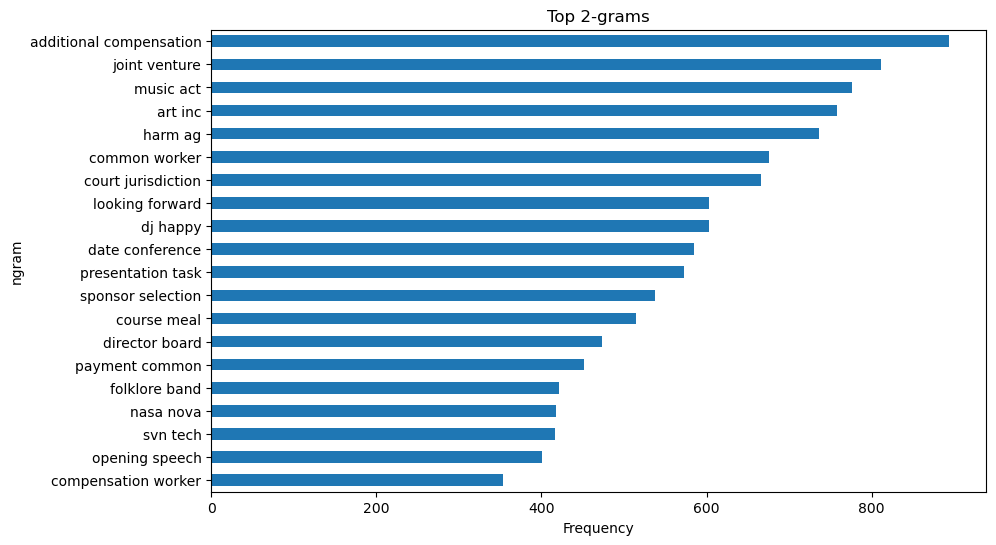

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=2):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 2)  # Example for bigrams


closings und opening sind weg namen auch aber enterprises sind nch driun


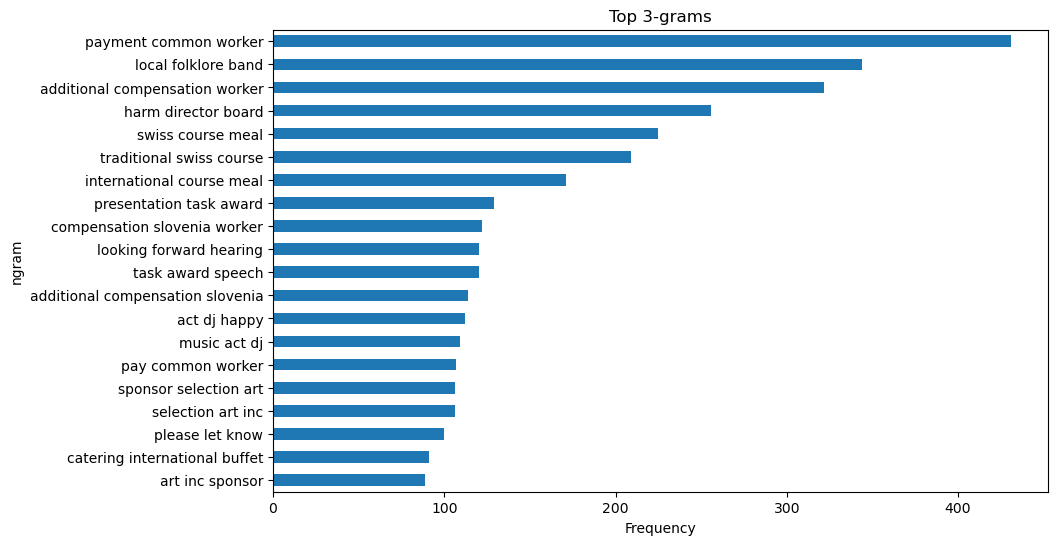

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 3)  # Example for trigrams


opnening und closings entfern passt schonmal und im verlgiech weniger freqeunbcy

## **<span style="color: orange;"> Named Entity Recognitions </span>**

In [84]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [85]:
#donwload the model separetely so it can be imported in the next cell
!python -m spacy download en_core_web_sm  


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [86]:
# Named entity recognition
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")

Model loaded successfully!


In [87]:

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message
sample_text = df['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text)

spaCy model loaded successfully!


<p style="text-align: justify;">
namen exisitieren net mehr. ein grosser satz füpr eine message firmen werden noch erkannt aber wuredn nicht entfdern</p>

In [88]:
import spacy
from collections import defaultdict
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    for text in dataset['Content']:
        doc = nlp(text)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities

# Extract entities from the dataset
entities = extract_entities_from_dataset(df)

# Convert entities to a DataFrame for better readability
entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))

# Display the extracted entities grouped by type
print(entity_df)


spaCy model loaded successfully!
                                                   ORG      PRODUCT  \
0    isa international student association global o...         nova   
1                         slovenia logical consequence  isa comfort   
2                       switzerland court jurisdiction          NaN   
3                              art inc multiple reason          NaN   
4                           meyer see point issue date          NaN   
..                                                 ...          ...   
215                                            art inc          NaN   
216                                    art inc art inc          NaN   
217                       u partner court jurisdiction          NaN   
218                            art inc argument formal          NaN   
219                                          dis thing          NaN   

             LOC        GPE     CARDINAL          DATE  \
0        mideast     poland          two    guess week  

Here we can see all of identified named entities in the negotiation messages.

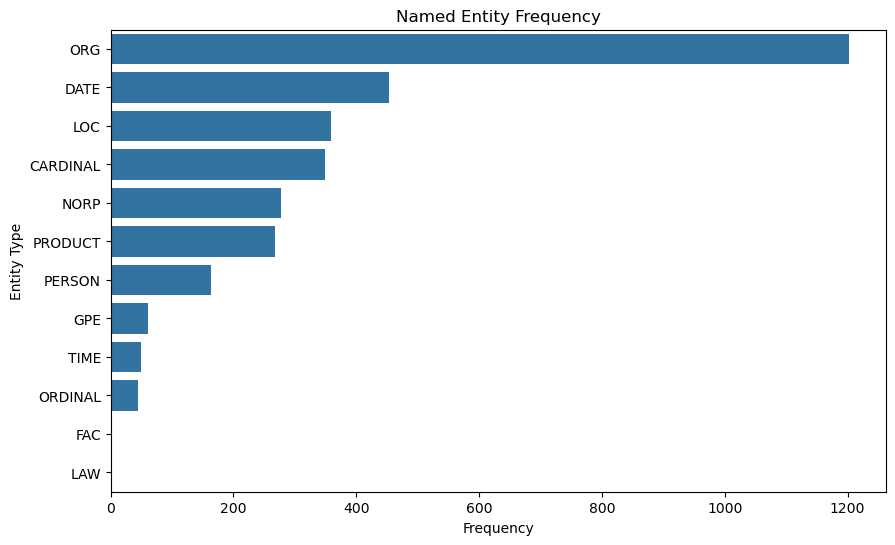

In [89]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

# Apply the ner function to the 'Content' column and flatten the results
ent = df['Content'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]  # Flatten the list of lists

# Count the occurrences of each entity type
counter = Counter(ent)
count = counter.most_common()

# Visualize the entity frequencies
x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x)
plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.title('Named Entity Frequency')
plt.show()


<p style="text-align: justify;">
named entity deutlic hverringert als zuvoir von 6000-1200</p>

## **<span style="color: orange;"> Part-of-Speech </span>**
Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy

spaCy model loaded successfully!


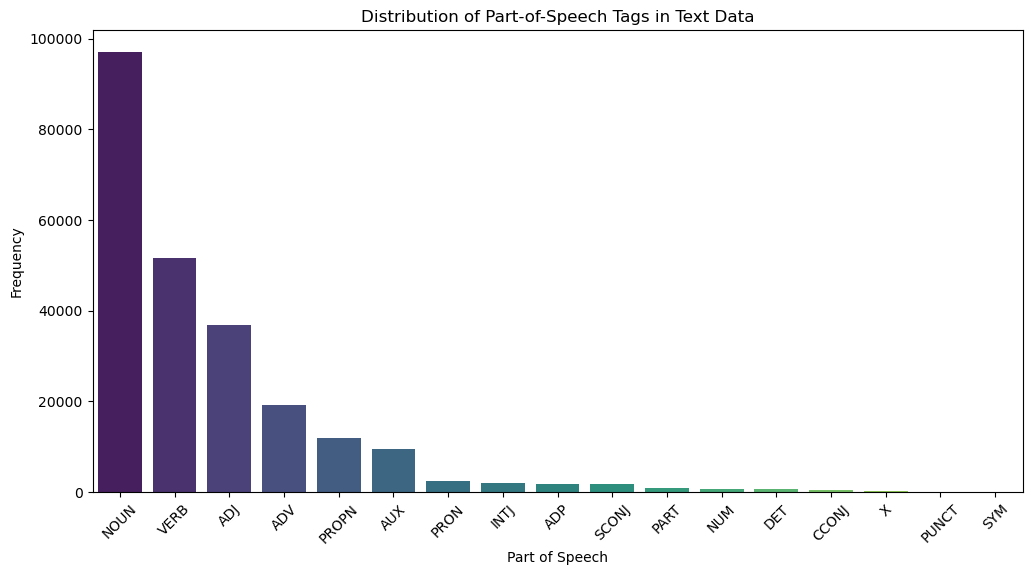

In [90]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply the POS tagging function to the text data
pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

# Flatten the list of lists into a single list of POS tags
pos_tags = [tag for sublist in pos_tags for tag in sublist]

# Count the occurrences of each POS tag
pos_counter = Counter(pos_tags)
pos_counts = pos_counter.most_common()

# Prepare the data for visualization
x, y = zip(*pos_counts)

# Visualize the distribution of POS tags
plt.figure(figsize=(12, 6))
sns.barplot(x=list(x), y=list(y), palette="viridis")
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Distribution of Part-of-Speech Tags in Text Data')
plt.xticks(rotation=45)
plt.show()


### Observations

*Dominant POS Tags:*

- NOUN has the highest frequency, followed by PRON (pronouns) and VERB. These tags are essential as they contribute to the core meaning and structure of the text.
- Moderate Frequency Tags: Tags like ADP (adpositions like prepositions), PUNCT (punctuation), DET (determiners), ADJ (adjectives), and AUX (auxiliary verbs) also appear frequently. They provide context, structure, and grammatical clarity.
- Low Frequency Tags: SYM (symbols), INTJ (interjections), X (miscellaneous), and NUM (numerals) are rare, which may contribute less to the semantic analysis of the text.


*What Can Stay*
- NOUN, VERB, ADJ, PRON, ADP: These tags are critical for understanding the core meaning and relationships in the text.
- AUX, DET, ADV: These contribute to grammatical structure and provide important contextual information.
- PUNCT: While punctuation may seem less critical, it often indicates sentence boundaries and tone, which can be useful for tasks like sentence segmentation or sentiment analysis.

*What Can Go*
- SYM (symbols): Symbols are usually not meaningful in many NLP tasks and can be removed unless specific to the context (e.g., technical or financial data).
- INTJ (interjections): Interjections rarely contribute significantly to the overall analysis and can be removed unless the dataset is focused on conversational or emotional expressions.
- SPACE: These are non-semantic and can be safely excluded during preprocessing.
- X (miscellaneous): This tag is often used for tokens that don't fit standard POS categories. It may not add value and can be excluded.


## **<span style="color: orange;"> Sentiment Analysis  </span>**

In [91]:
!pip install textblob

In [92]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment)

# Categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

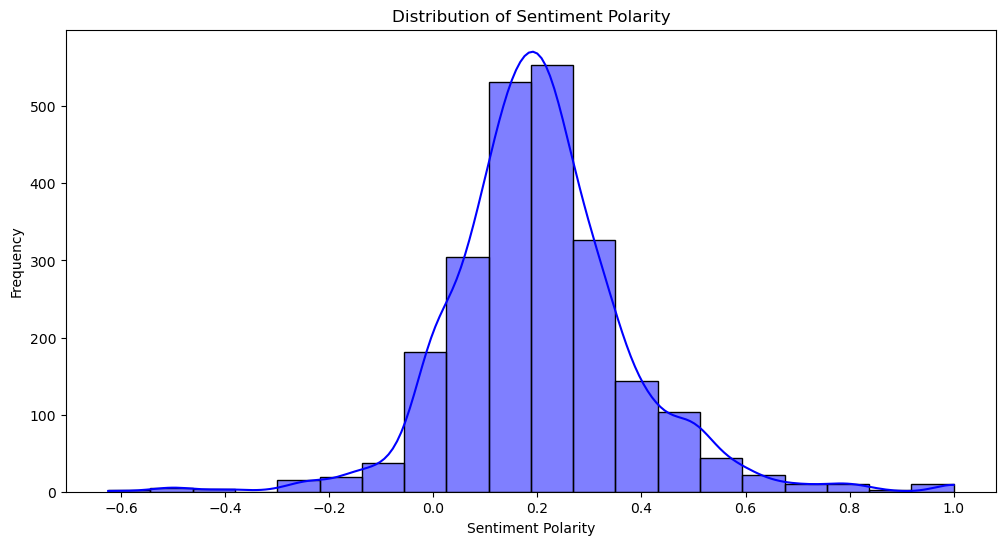

In [93]:
# Visualize the distribution of sentiment polarity scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Polarity Scores:
-1 to 0: Negative sentiment. The closer the score is to -1, the more negative the text is.
0: Neutral sentiment. Text that is neither strongly positive nor strongly negative.
0 to +1: Positive sentiment. The closer the score is to +1, the more positive the text is.

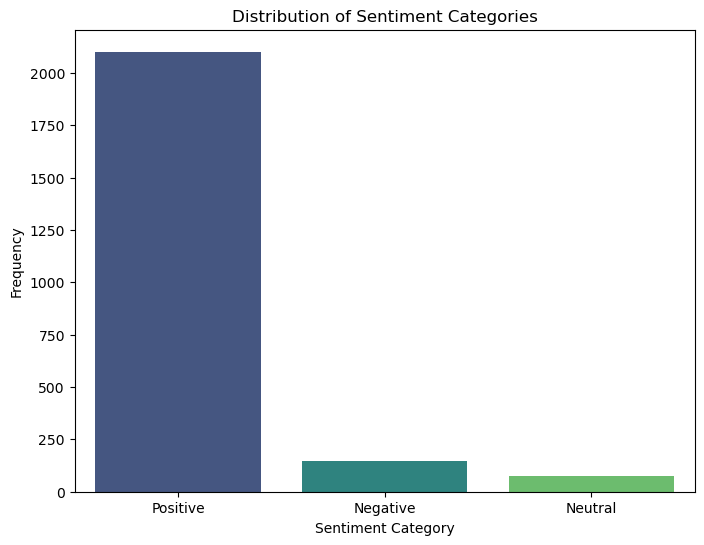

In [94]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='SentimentCategory', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

## Ex Post Analysis of Results
This section analyzes the results of the current code against the newly provided data.


Processing: Group1.xlsx

Missing values: 0, Duplicates: 8
Accepted messages: 1604, Rejected messages: 728

Processing: df_complete_cleansing.xlsx

Missing values: 4, Duplicates: 8
Accepted messages: 1601, Rejected messages: 727


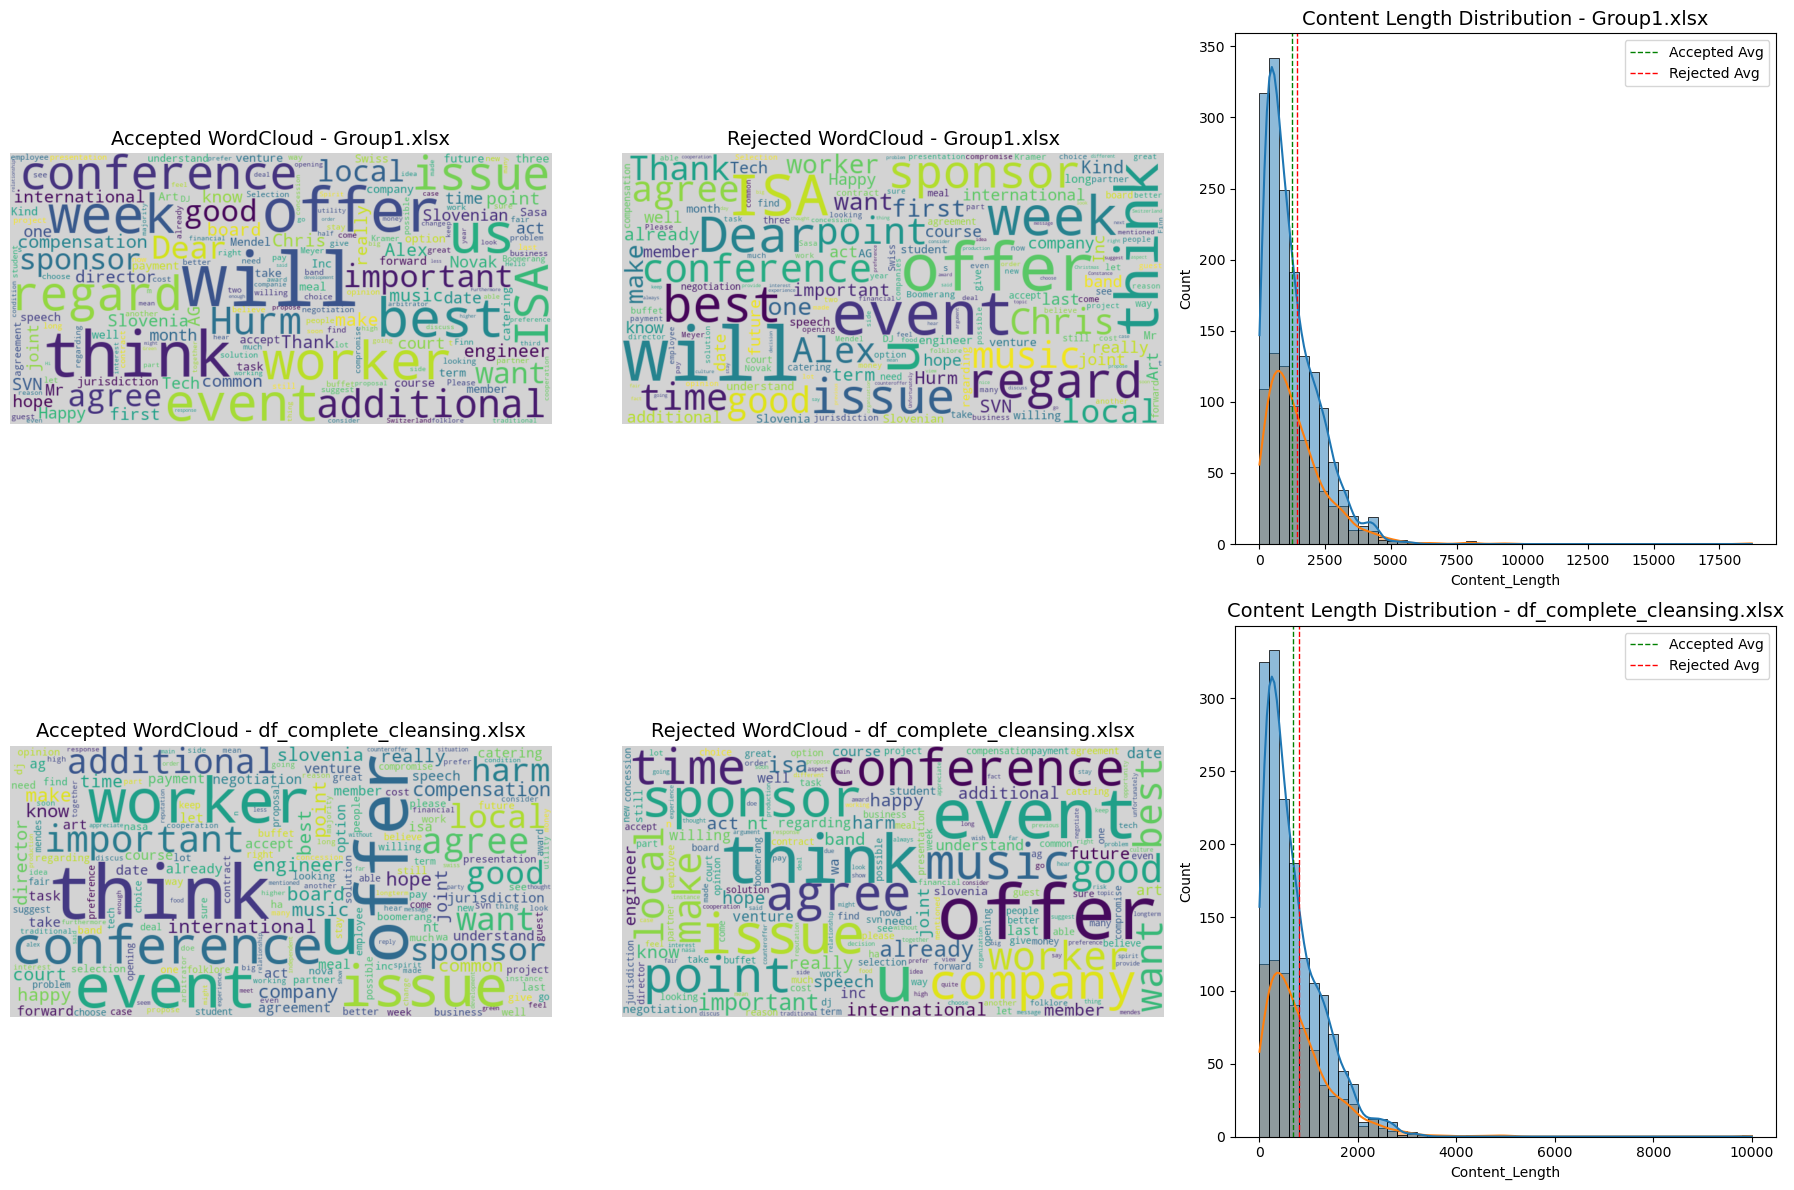

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

warnings.filterwarnings("ignore")


def analyze_and_compare_excel_files(file_paths):
    """
    Analyze multiple Excel files, perform NLP and visualization tasks,
    and compare their results in subplots.
    """
    results = {}

    for file_path in file_paths:
        print(f"\nProcessing: {file_path}\n")
        # Load dataset
        df = pd.read_excel(file_path)

        # Handle missing values and duplicates
        missing_values = df.isnull().sum().sum()
        duplicates = df.duplicated().sum()

        print(f"Missing values: {missing_values}, Duplicates: {duplicates}")
        df.dropna(inplace=True)  # Drop missing values

        # Content length and word count
        df["Content_Length"] = df["Content"].apply(len)
        df["Sentence_Count"] = df["Content"].apply(lambda x: len(sent_tokenize(str(x))))
        df["Word_Count_nltk"] = df["Content"].apply(lambda x: len(word_tokenize(str(x))))

        # Accepted and rejected messages
        accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
        rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

        # Word clouds
        wordcloud_accepted = WordCloud(
            width=800, height=400, max_font_size=110, collocations=False, background_color="lightgrey"
        ).generate(" ".join(accepted_messages))
        wordcloud_rejected = WordCloud(
            width=800, height=400, max_font_size=110, collocations=False, background_color="lightgrey"
        ).generate(" ".join(rejected_messages))

        # Summary statistics
        accepted_count = len(accepted_messages)
        rejected_count = len(rejected_messages)

        print(f"Accepted messages: {accepted_count}, Rejected messages: {rejected_count}")

        accepted_word_count_sum = accepted_messages.apply(lambda x: len(str(x).split())).sum()
        rejected_word_count_sum = rejected_messages.apply(lambda x: len(str(x).split())).sum()

        average_content_length_accepted = df[df["NegoOutcome"] == "FinalAccept"]["Content_Length"].mean()
        average_content_length_rejected = df[df["NegoOutcome"] == "FinalReject"]["Content_Length"].mean()

        # Save results for visualization
        results[file_path] = {
            "df": df,
            "wordcloud_accepted": wordcloud_accepted,
            "wordcloud_rejected": wordcloud_rejected,
            "accepted_word_count_sum": accepted_word_count_sum,
            "rejected_word_count_sum": rejected_word_count_sum,
            "average_content_length_accepted": average_content_length_accepted,
            "average_content_length_rejected": average_content_length_rejected,
        }

    # Visualize results
    num_files = len(file_paths)
    fig, axes = plt.subplots(num_files, 3, figsize=(18, 6 * num_files))

    for idx, file_path in enumerate(file_paths):
        df = results[file_path]["df"]
        wordcloud_accepted = results[file_path]["wordcloud_accepted"]
        wordcloud_rejected = results[file_path]["wordcloud_rejected"]
        avg_accepted = results[file_path]["average_content_length_accepted"]
        avg_rejected = results[file_path]["average_content_length_rejected"]

        # Adjust subplot axes if only one file
        if num_files == 1:
            ax_wordcloud_accepted, ax_wordcloud_rejected, ax_histogram = axes
        else:
            ax_wordcloud_accepted, ax_wordcloud_rejected, ax_histogram = axes[idx]

        # Word cloud for accepted messages
        ax_wordcloud_accepted.imshow(wordcloud_accepted, interpolation="bilinear")
        ax_wordcloud_accepted.set_title(f"Accepted WordCloud - {file_path}", fontsize=14)
        ax_wordcloud_accepted.axis("off")

        # Word cloud for rejected messages
        ax_wordcloud_rejected.imshow(wordcloud_rejected, interpolation="bilinear")
        ax_wordcloud_rejected.set_title(f"Rejected WordCloud - {file_path}", fontsize=14)
        ax_wordcloud_rejected.axis("off")

        # Histogram of content lengths
        sns.histplot(data=df, x="Content_Length", hue="NegoOutcome", ax=ax_histogram, kde=True, bins=50)
        ax_histogram.axvline(avg_accepted, color="green", linestyle="dashed", linewidth=1, label="Accepted Avg")
        ax_histogram.axvline(avg_rejected, color="red", linestyle="dashed", linewidth=1, label="Rejected Avg")
        ax_histogram.legend()
        ax_histogram.set_title(f"Content Length Distribution - {file_path}", fontsize=14)

    plt.tight_layout()
    plt.show()


# Example Usage
file_paths = ["Group1.xlsx", "df_complete_cleansing.xlsx"]  # Use specified file names
analyze_and_compare_excel_files(file_paths)


### Key Findings from the Analysis
- **Sentiment Scores**: Highlight any discrepancies or alignment between the datasets.
- **Content Length**: Discuss variations in content length metrics.
- **Recommendations**: Suggest improvements or alignments for future analysis.


Processing: Group1.xlsx


Processing: df_complete_cleansing.xlsx


Key Performance Indicators Comparison:

                         File  Total Messages  Final Accept  Final Reject  \
0                 Group1.xlsx            2332          1604           728   
1  df_complete_cleansing.xlsx            2328          1601           727   

   Avg Content Length  Avg Word Count  Change in Total Messages (%)  \
0             1291.42          230.88                     -0.171527   
1              728.54          101.36                     -0.171527   

   Change in Final Accept (%)  Change in Final Reject (%)  \
0                   -0.187032                   -0.137363   
1                   -0.187032                   -0.137363   

   Change in Avg Content Length (%)  Change in Avg Word Count (%)  
0                         -43.58613                    -56.098406  
1                         -43.58613                    -56.098406  


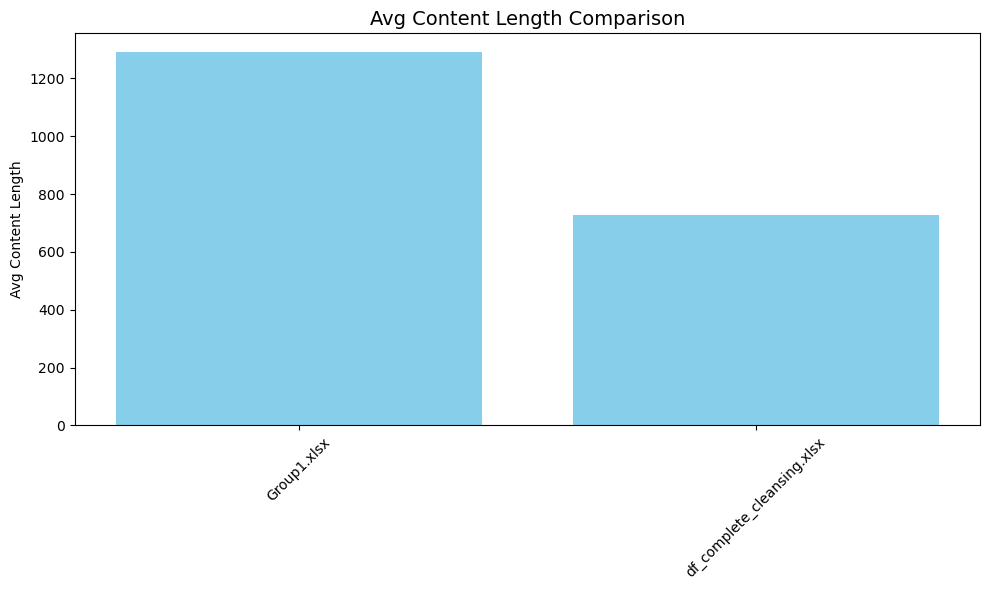

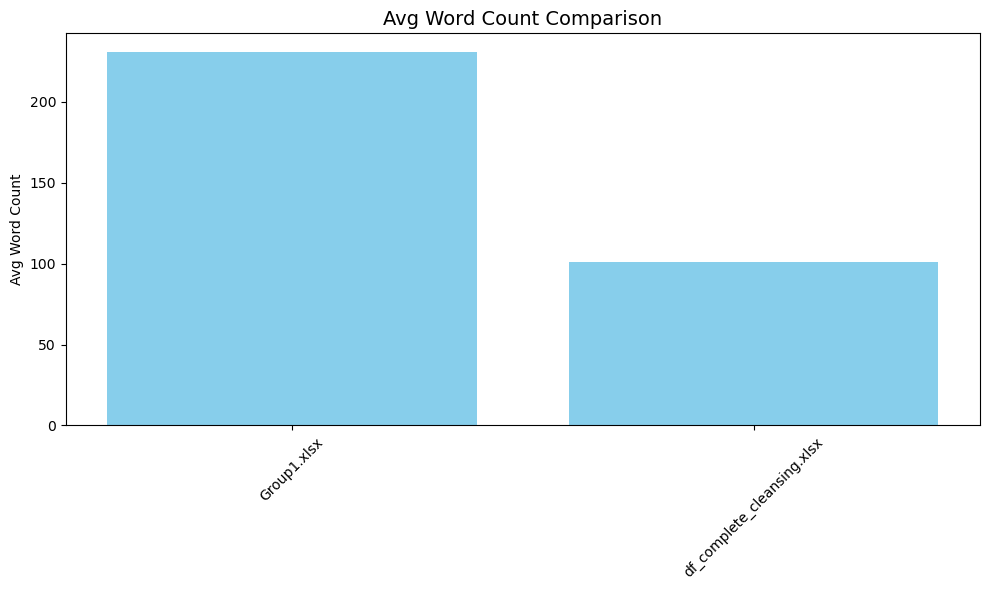

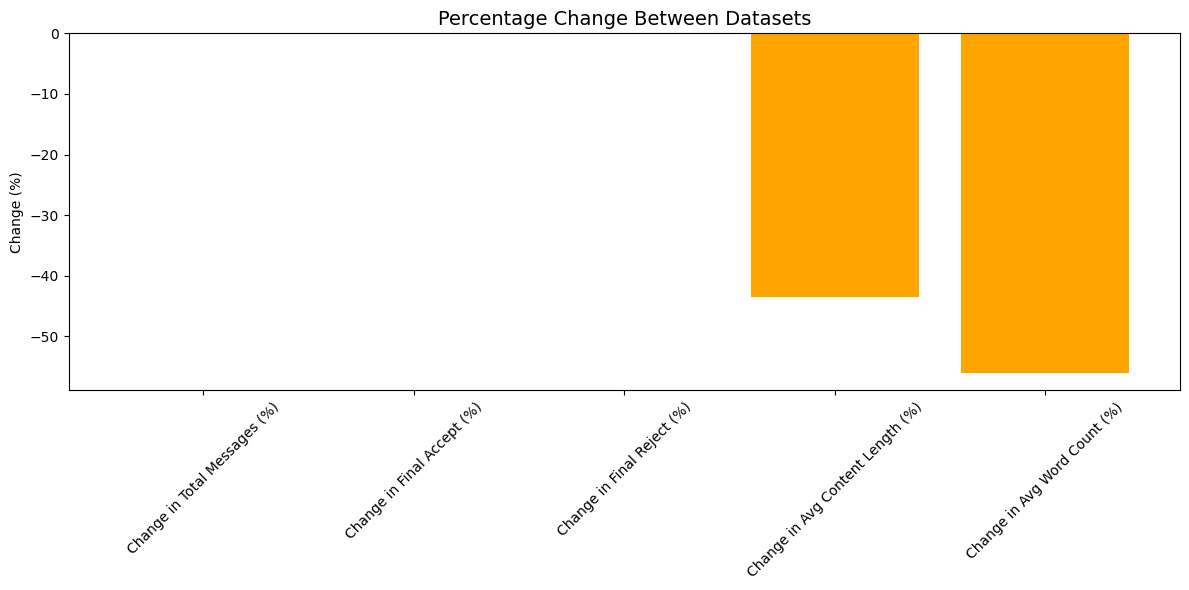

In [99]:
def calculate_kpis_with_changes(file_paths):
    """
    Calculate and present important KPIs from Excel files for comparison,
    with a focus on average values and percentage changes between datasets.
    """
    kpi_results = []

    for file_path in file_paths:
        print(f"\nProcessing: {file_path}\n")
        # Load dataset
        df = pd.read_excel(file_path)

        # Handle missing values and duplicates
        df.dropna(inplace=True)

        # KPIs
        total_messages = len(df)
        final_accept_count = (df["NegoOutcome"] == "FinalAccept").sum()
        final_reject_count = (df["NegoOutcome"] == "FinalReject").sum()

        avg_content_length = df["Content"].apply(len).mean()
        avg_word_count = df["Content"].apply(lambda x: len(str(x).split())).mean()

        kpi_results.append({
            "File": file_path,
            "Total Messages": total_messages,
            "Final Accept": final_accept_count,
            "Final Reject": final_reject_count,
            "Avg Content Length": round(avg_content_length, 2),
            "Avg Word Count": round(avg_word_count, 2),
        })

    # Convert results to DataFrame
    kpi_df = pd.DataFrame(kpi_results)

    # Calculate percentage changes if there are exactly two datasets
    if len(kpi_df) == 2:
        kpi_df["Change in Total Messages (%)"] = (
            (kpi_df["Total Messages"].iloc[1] - kpi_df["Total Messages"].iloc[0])
            / kpi_df["Total Messages"].iloc[0]
            * 100
        )
        kpi_df["Change in Final Accept (%)"] = (
            (kpi_df["Final Accept"].iloc[1] - kpi_df["Final Accept"].iloc[0])
            / kpi_df["Final Accept"].iloc[0]
            * 100
        )
        kpi_df["Change in Final Reject (%)"] = (
            (kpi_df["Final Reject"].iloc[1] - kpi_df["Final Reject"].iloc[0])
            / kpi_df["Final Reject"].iloc[0]
            * 100
        )
        kpi_df["Change in Avg Content Length (%)"] = (
            (kpi_df["Avg Content Length"].iloc[1] - kpi_df["Avg Content Length"].iloc[0])
            / kpi_df["Avg Content Length"].iloc[0]
            * 100
        )
        kpi_df["Change in Avg Word Count (%)"] = (
            (kpi_df["Avg Word Count"].iloc[1] - kpi_df["Avg Word Count"].iloc[0])
            / kpi_df["Avg Word Count"].iloc[0]
            * 100
        )

    print("\nKey Performance Indicators Comparison:\n")
    print(kpi_df)

    # Visualize KPIs
    for kpi in ["Avg Content Length", "Avg Word Count"]:
        plt.figure(figsize=(10, 6))
        plt.bar(kpi_df["File"], kpi_df[kpi], color="skyblue")
        plt.title(f"{kpi} Comparison", fontsize=14)
        plt.ylabel(kpi)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    if len(kpi_df) == 2:
        # Visualize percentage changes
        change_columns = [col for col in kpi_df.columns if "Change in" in col]
        changes = kpi_df.iloc[1, -len(change_columns):].to_dict()

        plt.figure(figsize=(12, 6))
        plt.bar(changes.keys(), changes.values(), color="orange")
        plt.title("Percentage Change Between Datasets", fontsize=14)
        plt.ylabel("Change (%)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Example Usage
file_paths = ["Group1.xlsx", "df_complete_cleansing.xlsx"]  # Use specified file names
calculate_kpis_with_changes(file_paths)
